# Taxi Dispatch Project

Reading the file that we created in ```Dataset_Preparation.ipynb```.

In [23]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/filtered_tripdata.csv')

print(df.columns)

results = {}

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'PULocationID', 'DOLocationID', 'fare_amount', 'extra',
       'mta_tax', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'trip_duration', 'pickup_latitude',
       'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'],
      dtype='object')


In [ ]:
df.head()

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2024-06-09 01:07:07   2024-06-09 01:15:39              1.0           3.31   
1  2024-06-09 01:42:18   2024-06-09 01:48:31              2.0           0.70   
2  2024-06-09 05:37:11   2024-06-09 05:57:51              1.0          19.75   
3  2024-06-09 05:38:10   2024-06-09 05:49:40              1.0           9.07   
4  2024-06-09 06:01:10   2024-06-09 06:13:09              1.0          10.10   

   PULocationID  DOLocationID  fare_amount  extra  mta_tax  \
0            93           129        14.90    1.0      0.5   
1            93           145         7.90    1.0      0.5   
2            93           239        70.00    0.0      0.5   
3            93           137         0.75    0.0      0.5   
4            93            42        70.00    0.0      0.5   

   improvement_surcharge  total_amount  congestion_surcharge  trip_duration  \
0                    1.0         17.40                   0.0          512.0   
1                    1.0         10.40                   0.0          373.0   
2                    1.0         90.94                   2.5         1240.0   
3                    1.0         10.19                   2.5          690.0   
4                    1.0         98.05                   0.0          719.0   

   pickup_latitude  pickup_longitude  dropoff_latitude  dropoff_longitude  
0        40.740676        -73.840867         40.757312         -73.885317  
1        40.740676        -73.840867         40.745379         -73.948891  
2        40.740676        -73.840867         40.783961         -73.978632  
3        40.740676        -73.840867         40.740439         -73.976495  
4        40.740676        -73.840867         40.818258         -73.940772

In [ ]:
len(df)

6993

In [ ]:
#Total number of passengers across all trips
total_passengers = df['passenger_count'].sum()
print(f"Total number of passengers: {int(total_passengers)}")

Total number of passengers: 8743


In [ ]:
#Total trip distance across all trips
total_dist = df['trip_distance'].sum()
print(f"Total trip distance: {int(total_dist)}")

Total trip distance: 17169


In [ ]:
#Total fare amount across all trips
total_amt = df['fare_amount'].sum()
print(f"Total fare amount: {int(total_amt)}")

Total fare amount: 110508


# Taxi Company A: 20 Taxis

Condition 1: Trips < 10 Miles

In [ ]:
# Condition 1: Trips < 10 Miles
short_trips = df[df['trip_distance'] < 10].copy()

avg_speed_mph = 30  # Assumed average
short_trips['trip_time_hr'] = short_trips['trip_distance'] / avg_speed_mph

# Round trip time = 2 * trip time
short_trips['round_trip_time_hr'] = short_trips['trip_time_hr'] * 2

taxis = [0] * 20
total_fare = 0
total_distance = 0
trip_count = 0

for idx, row in short_trips.iterrows():
    earliest_taxi = np.argmin(taxis)
    current_time = taxis[earliest_taxi]

    #5-hour limit
    if current_time + row['round_trip_time_hr'] <= 5:
        taxis[earliest_taxi] += row['round_trip_time_hr']
        total_fare += row['fare_amount']
        total_distance += row['trip_distance'] * 2
        trip_count += 1
    else:
        continue

print(f"Total fare: {total_fare}")
print(f"Total distance: {total_distance}")
print(f"Total trips: {trip_count}")

results['Short Trips Alone(20)'] = {
    'Total Fare': total_fare,
    'Total Distance': total_distance,
    'Total Trips': trip_count
}

Total fare: 14844.910000000007
Total distance: 2998.9399999999932
Total trips: 956


Condition 2: Trips >= 10 Miles

In [ ]:
#Condition 2: Trips >= 10 Miles
long_trips = df[df['trip_distance'] >= 10].copy()

avg_speed_mph = 30  #Assumed average
long_trips['trip_time_hr'] = long_trips['trip_distance'] / avg_speed_mph

# Round trip time = 2 * trip time
long_trips['round_trip_time_hr'] = long_trips['trip_time_hr'] * 2

taxis = [0] * 20

total_fare = 0
total_distance = 0
trip_count = 0

for idx, row in long_trips.iterrows():
    earliest_taxi = np.argmin(taxis)
    current_time = taxis[earliest_taxi]

    #5-hour limit
    if current_time + row['round_trip_time_hr'] <= 5:
        taxis[earliest_taxi] += row['round_trip_time_hr']

        total_fare += row['fare_amount']
        total_distance += row['trip_distance'] * 2
        trip_count += 1
    else:
        continue

print("Condition 2: Long Trips (>=10 Miles)")
print(f"Total fare: {total_fare}")
print(f"Total distance (including return): {total_distance}")
print(f"Total number of trips: {trip_count}")

results['Long Trips Alone(20)'] = {
    'Total Fare': total_fare,
    'Total Distance': total_distance,
    'Total Trips': trip_count
}

Condition 2: Long Trips (>=10 km)
Total fare: 5652.270000000001
Total distance (including return): 2503.640000000001
Total number of trips: 85


Condition 3: Regular Trips

In [23]:
#Condition 3: Regular Trips
random_trips = df.sample(frac=1).copy()

avg_speed_mph = 30
random_trips['trip_time_hr'] = random_trips['trip_distance'] / avg_speed_mph

random_trips['round_trip_time_hr'] = random_trips['trip_time_hr'] * 2

taxis = [0] * 20

total_fare = 0
total_distance = 0
trip_count = 0

for idx, row in random_trips.iterrows():
    earliest_taxi = np.argmin(taxis)
    current_time = taxis[earliest_taxi]

    if current_time + row['round_trip_time_hr'] <= 5:
        taxis[earliest_taxi] += row['round_trip_time_hr']
        total_fare += row['fare_amount']
        total_distance += row['trip_distance'] * 2
        trip_count += 1
    else:
        continue

print("Condition 3: Regular Trips")
print(f"Total fare: {total_fare}")
print(f"Total distance (including return): {total_distance}")
print(f"Total number of trips: {trip_count}")

results['Regular Trips(20)'] = {
    'Total Fare': total_fare,
    'Total Distance': total_distance,
    'Total Trips': trip_count
}

Condition 3: Regular Trips
Total fare: 11294.759999999987
Total distance (including return): 2996.319999999996
Total number of trips: 613


## Greedy Algorithm

Greedy + Short Trips

In [ ]:
import numpy as np

df = pd.read_csv('/content/filtered_tripdata.csv')
short_trips = df[df['trip_distance'] < 10].copy()

avg_speed_mph = 30
short_trips['trip_time_hr'] = short_trips['trip_distance'] / avg_speed_mph

short_trips['round_trip_time_hr'] = short_trips['trip_time_hr'] * 2

short_trips['fare_per_hr'] = short_trips['fare_amount'] / short_trips['round_trip_time_hr']

greedy_sorted_trips = short_trips.sort_values(by='fare_per_hr', ascending=False)

taxis = [0] * 20

total_fare = 0
total_distance = 0
trip_count = 0

#Greedy Assignment Loop
for idx, row in greedy_sorted_trips.iterrows():
    earliest_taxi = np.argmin(taxis)
    current_time = taxis[earliest_taxi]

    if current_time + row['round_trip_time_hr'] <= 5:
        taxis[earliest_taxi] += row['round_trip_time_hr']
        total_fare += row['fare_amount']
        total_distance += row['trip_distance'] * 2
        trip_count += 1
    else:
        continue

print(f"Total fare: {total_fare:.2f}")
print(f"Total distance: {total_distance:.2f} Miles")
print(f"Total trips: {trip_count}")

results['Greedy (20 taxis)'] = {
    'Total Fare': total_fare,
    'Total Distance': total_distance,
    'Total Trips': trip_count
}

Total fare: 16563.98
Total distance: 2989.76 km
Total trips: 1122


Greedy + Long Trips

In [ ]:
import numpy as np

df = pd.read_csv('/content/filtered_tripdata.csv')
short_trips = df[df['trip_distance'] >= 10].copy()

avg_speed_mph = 30
short_trips['trip_time_hr'] = short_trips['trip_distance'] / avg_speed_mph

short_trips['round_trip_time_hr'] = short_trips['trip_time_hr'] * 2

short_trips['fare_per_hr'] = short_trips['fare_amount'] / short_trips['round_trip_time_hr']

greedy_sorted_trips = short_trips.sort_values(by='fare_per_hr', ascending=False)

taxis = [0] * 20

total_fare = 0
total_distance = 0
trip_count = 0

for idx, row in greedy_sorted_trips.iterrows():
    earliest_taxi = np.argmin(taxis)
    current_time = taxis[earliest_taxi]

    if current_time + row['round_trip_time_hr'] <= 5:
        taxis[earliest_taxi] += row['round_trip_time_hr']
        total_fare += row['fare_amount']
        total_distance += row['trip_distance'] * 2
        trip_count += 1
    else:
        continue

print(f"Total fare: {total_fare:.2f}")
print(f"Total distance: {total_distance:.2f} mi")
print(f"Total trips: {trip_count}")

results['Greedy (20 taxis)'] = {
    'Total Fare': total_fare,
    'Total Distance': total_distance,
    'Total Trips': trip_count
}

Total fare: 5626.37
Total distance: 2489.68 km
Total trips: 85


Greedy + Regular Trips

In [ ]:
import numpy as np

df = pd.read_csv('/content/filtered_tripdata.csv')
short_trips = df.copy()

avg_speed_mph = 30
short_trips['trip_time_hr'] = short_trips['trip_distance'] / avg_speed_mph

short_trips['round_trip_time_hr'] = short_trips['trip_time_hr'] * 2

short_trips['fare_per_hr'] = short_trips['fare_amount'] / short_trips['round_trip_time_hr']

greedy_sorted_trips = short_trips.sort_values(by='fare_per_hr', ascending=False)

taxis = [0] * 20

total_fare = 0
total_distance = 0
trip_count = 0

for idx, row in greedy_sorted_trips.iterrows():
    earliest_taxi = np.argmin(taxis)
    current_time = taxis[earliest_taxi]

    if current_time + row['round_trip_time_hr'] <= 5:
        taxis[earliest_taxi] += row['round_trip_time_hr']
        total_fare += row['fare_amount']
        total_distance += row['trip_distance'] * 2
        trip_count += 1
    else:
        continue

print(f"Total fare: {total_fare:.2f}")
print(f"Total distance: {total_distance:.2f} mi")
print(f"Total trips: {trip_count}")

results['Greedy (20 taxis)'] = {
    'Total Fare': total_fare,
    'Total Distance': total_distance,
    'Total Trips': trip_count
}

Total fare: 16558.58
Total distance: 2988.50 km
Total trips: 1123


## Round Robin

RR + Short Trips

In [24]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/filtered_tripdata.csv')
df = df[df['trip_distance'] < 10].copy()

avg_speed_mph = 30
df['trip_time_hr'] = df['trip_distance'] / avg_speed_mph
df['round_trip_time_hr'] = df['trip_time_hr'] * 2

round_robin_trips = df.copy()

taxis = [0] * 20
total_fare = 0
total_distance = 0
trip_count = 0
taxi_index = 0

for idx, row in round_robin_trips.iterrows():
    current_time = taxis[taxi_index]

    if current_time + row['round_trip_time_hr'] <= 5:
        taxis[taxi_index] += row['round_trip_time_hr']
        total_fare += row['fare_amount']
        total_distance += row['trip_distance'] * 2
        trip_count += 1

    taxi_index = (taxi_index + 1) % len(taxis) # Move to the next taxi in a round-robin fashion


print("Round Robin Algorithm")
print(f"Total fare: {total_fare:.2f}")
print(f"Total distance: {total_distance:.2f} mi")
print(f"Total trips: {trip_count}")

results['Round Robin (20 taxis)'] = {
    'Total Fare': total_fare,
    'Total Distance': total_distance,
    'Total Trips': trip_count
}

Round Robin Algorithm
Total fare: 11271.33
Total distance: 2993.42 mi
Total trips: 697


RR + Long Trips

In [25]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/filtered_tripdata.csv')
df = df[df['trip_distance'] >= 10].copy()

avg_speed_mph = 30
df['trip_time_hr'] = df['trip_distance'] / avg_speed_mph
df['round_trip_time_hr'] = df['trip_time_hr'] * 2

round_robin_trips = df.copy()

taxis = [0] * 20
total_fare = 0
total_distance = 0
trip_count = 0
taxi_index = 0

for idx, row in round_robin_trips.iterrows():
    current_time = taxis[taxi_index]

    if current_time + row['round_trip_time_hr'] <= 5:
        taxis[taxi_index] += row['round_trip_time_hr']
        total_fare += row['fare_amount']
        total_distance += row['trip_distance'] * 2
        trip_count += 1

    taxi_index = (taxi_index + 1) % len(taxis) # Move to the next taxi in a round-robin fashion


print("Round Robin Algorithm")
print(f"Total fare: {total_fare:.2f}")
print(f"Total distance: {total_distance:.2f} mi")
print(f"Total trips: {trip_count}")

results['Round Robin (20 taxis)'] = {
    'Total Fare': total_fare,
    'Total Distance': total_distance,
    'Total Trips': trip_count
}

Round Robin Algorithm
Total fare: 0.00
Total distance: 0.00 mi
Total trips: 0


RR + Regular Trips

In [26]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/filtered_tripdata.csv')

avg_speed_mph = 30
df['trip_time_hr'] = df['trip_distance'] / avg_speed_mph
df['round_trip_time_hr'] = df['trip_time_hr'] * 2

round_robin_trips = df.copy()

taxis = [0] * 20
total_fare = 0
total_distance = 0
trip_count = 0
taxi_index = 0

for idx, row in round_robin_trips.iterrows():
    current_time = taxis[taxi_index]

    if current_time + row['round_trip_time_hr'] <= 5:
        taxis[taxi_index] += row['round_trip_time_hr']
        total_fare += row['fare_amount']
        total_distance += row['trip_distance'] * 2
        trip_count += 1

    taxi_index = (taxi_index + 1) % len(taxis) # Move to the next taxi in a round-robin fashion


print("Round Robin Algorithm")
print(f"Total fare: {total_fare:.2f}")
print(f"Total distance: {total_distance:.2f} mi")
print(f"Total trips: {trip_count}")

results['Round Robin (20 taxis)'] = {
    'Total Fare': total_fare,
    'Total Distance': total_distance,
    'Total Trips': trip_count
}

Round Robin Algorithm
Total fare: 0.00
Total distance: 0.00 mi
Total trips: 0


##Swarm Alg: Particle Swarm Optimization

PSO + Short Trips

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

df = pd.read_csv('filtered_tripdata.csv')
df = df[df['trip_distance'] < 10].copy()

avg_speed_mph = 30
df['trip_time_hr'] = df['trip_distance'] / avg_speed_mph
df['round_trip_time_hr'] = df['trip_time_hr'] * 2

trips = df[['trip_distance', 'fare_amount', 'round_trip_time_hr']].reset_index(drop=True)
num_trips = len(trips)

num_particles = 30
num_iterations = 100
w = 0.5
c1 = 1.5
c2 = 1.5

positions = [np.random.rand(num_trips) for _ in range(num_particles)]
velocities = [np.random.rand(num_trips) * 0.1 for _ in range(num_particles)]
pbest_positions = positions.copy()
pbest_scores = [-np.inf] * num_particles

gbest_position = None
gbest_score = -np.inf

def evaluate(position):
    sorted_indices = np.argsort(-position)
    taxis = [0] * 20
    total_fare = 0
    total_distance = 0
    trip_count = 0

    for idx in sorted_indices:
        trip = trips.loc[idx]
        earliest_taxi = np.argmin(taxis)
        current_time = taxis[earliest_taxi]

        if current_time + trip['round_trip_time_hr'] <= 5:
            taxis[earliest_taxi] += trip['round_trip_time_hr']
            total_fare += trip['fare_amount']
            total_distance += trip['trip_distance'] * 2
            trip_count += 1
        else:
            continue

    return total_fare, total_distance, trip_count


# PSO Main Loop
for iteration in range(num_iterations):
    for i in range(num_particles):
        fare, dist, trips_done = evaluate(positions[i])

        if fare > pbest_scores[i]:
            pbest_scores[i] = fare
            pbest_positions[i] = positions[i].copy()

        if fare > gbest_score:
            gbest_score = fare
            gbest_position = positions[i].copy()

    for i in range(num_particles):
        r1 = np.random.rand(num_trips)
        r2 = np.random.rand(num_trips)

        velocities[i] = (w * velocities[i] +
                         c1 * r1 * (pbest_positions[i] - positions[i]) +
                         c2 * r2 * (gbest_position - positions[i]))
        positions[i] += velocities[i]

    if iteration % 10 == 0:
        print(f"Iteration {iteration}: Best fare so far = {gbest_score}")

final_fare, final_distance, final_trip_count = evaluate(gbest_position)

print("\n=== Best Solution Found by PSO ===")
print(f"Total Fare: {final_fare}")
print(f"Total Distance (including return): {final_distance}")
print(f"Total Trips: {final_trip_count}")

results['PSO (20 taxis)'] = {
    'Total Fare': final_fare,
    'Total Distance': final_distance,
    'Total Trips': final_trip_count
}

Iteration 0: Best fare so far = 11662.070000000012
Iteration 10: Best fare so far = 12185.210000000003
Iteration 20: Best fare so far = 12325.159999999994
Iteration 30: Best fare so far = 12464.770000000006
Iteration 40: Best fare so far = 12583.180000000006
Iteration 50: Best fare so far = 12608.960000000005
Iteration 60: Best fare so far = 12618.660000000007
Iteration 70: Best fare so far = 12651.460000000008
Iteration 80: Best fare so far = 12654.960000000008
Iteration 90: Best fare so far = 12667.38000000001

=== Best Solution Found by PSO ===
Total Fare: 12677.380000000012
Total Distance (including return): 2996.780000000002
Total Trips: 764


PSO + Long Trips

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

df = pd.read_csv('filtered_tripdata.csv')
df = df[df['trip_distance'] >= 10].copy()

avg_speed_mph = 30
df['trip_time_hr'] = df['trip_distance'] / avg_speed_mph
df['round_trip_time_hr'] = df['trip_time_hr'] * 2

trips = df[['trip_distance', 'fare_amount', 'round_trip_time_hr']].reset_index(drop=True)
num_trips = len(trips)

num_particles = 30
num_iterations = 100
w = 0.5
c1 = 1.5
c2 = 1.5


positions = [np.random.rand(num_trips) for _ in range(num_particles)]
velocities = [np.random.rand(num_trips) * 0.1 for _ in range(num_particles)]
pbest_positions = positions.copy()
pbest_scores = [-np.inf] * num_particles

gbest_position = None
gbest_score = -np.inf


def evaluate(position):

    sorted_indices = np.argsort(-position)
    taxis = [0] * 20
    total_fare = 0
    total_distance = 0
    trip_count = 0


    for idx in sorted_indices:
        trip = trips.loc[idx]
        earliest_taxi = np.argmin(taxis)
        current_time = taxis[earliest_taxi]


        if current_time + trip['round_trip_time_hr'] <= 5:

            taxis[earliest_taxi] += trip['round_trip_time_hr']

            total_fare += trip['fare_amount']
            total_distance += trip['trip_distance'] * 2
            trip_count += 1
        else:
            continue

    return total_fare, total_distance, trip_count



for iteration in range(num_iterations):
    for i in range(num_particles):
        fare, dist, trips_done = evaluate(positions[i])

        if fare > pbest_scores[i]:
            pbest_scores[i] = fare
            pbest_positions[i] = positions[i].copy()

        if fare > gbest_score:
            gbest_score = fare
            gbest_position = positions[i].copy()

    for i in range(num_particles):
        r1 = np.random.rand(num_trips)
        r2 = np.random.rand(num_trips)

        velocities[i] = (w * velocities[i] +
                         c1 * r1 * (pbest_positions[i] - positions[i]) +
                         c2 * r2 * (gbest_position - positions[i]))
        positions[i] += velocities[i]

    if iteration % 10 == 0:
        print(f"Iteration {iteration}: Best fare so far = {gbest_score}")

final_fare, final_distance, final_trip_count = evaluate(gbest_position)

print("\n=== Best Solution Found by PSO ===")
print(f"Total Fare: {final_fare}")
print(f"Total Distance (including return): {final_distance}")
print(f"Total Trips: {final_trip_count}")

results['PSO (20 taxis)'] = {
    'Total Fare': final_fare,
    'Total Distance': final_distance,
    'Total Trips': final_trip_count
}

Iteration 0: Best fare so far = 5746.970000000002
Iteration 10: Best fare so far = 5746.970000000005
Iteration 20: Best fare so far = 5746.970000000005
Iteration 30: Best fare so far = 5746.970000000005
Iteration 40: Best fare so far = 5746.970000000005
Iteration 50: Best fare so far = 5746.970000000005
Iteration 60: Best fare so far = 5746.970000000005
Iteration 70: Best fare so far = 5746.970000000005
Iteration 80: Best fare so far = 5746.970000000005
Iteration 90: Best fare so far = 5746.970000000005

=== Best Solution Found by PSO ===
Total Fare: 5746.970000000005
Total Distance (including return): 2553.04
Total Trips: 86


PSO + Regular Trips

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

df = pd.read_csv('filtered_tripdata.csv')

avg_speed_mph = 30
df['trip_time_hr'] = df['trip_distance'] / avg_speed_mph
df['round_trip_time_hr'] = df['trip_time_hr'] * 2

trips = df[['trip_distance', 'fare_amount', 'round_trip_time_hr']].reset_index(drop=True)
num_trips = len(trips)

num_particles = 30
num_iterations = 100
w = 0.5
c1 = 1.5
c2 = 1.5

positions = [np.random.rand(num_trips) for _ in range(num_particles)]
velocities = [np.random.rand(num_trips) * 0.1 for _ in range(num_particles)]
pbest_positions = positions.copy()
pbest_scores = [-np.inf] * num_particles

gbest_position = None
gbest_score = -np.inf

def evaluate(position):
    sorted_indices = np.argsort(-position)
    taxis = [0] * 20
    total_fare = 0
    total_distance = 0
    trip_count = 0

    for idx in sorted_indices:
        trip = trips.loc[idx]
        earliest_taxi = np.argmin(taxis)
        current_time = taxis[earliest_taxi]

        if current_time + trip['round_trip_time_hr'] <= 5:
            taxis[earliest_taxi] += trip['round_trip_time_hr']
            total_fare += trip['fare_amount']
            total_distance += trip['trip_distance'] * 2
            trip_count += 1
        else:
            continue

    return total_fare, total_distance, trip_count


for iteration in range(num_iterations):
    for i in range(num_particles):
        fare, dist, trips_done = evaluate(positions[i])

        if fare > pbest_scores[i]:
            pbest_scores[i] = fare
            pbest_positions[i] = positions[i].copy()

        if fare > gbest_score:
            gbest_score = fare
            gbest_position = positions[i].copy()

    for i in range(num_particles):
        r1 = np.random.rand(num_trips)
        r2 = np.random.rand(num_trips)

        velocities[i] = (w * velocities[i] +
                         c1 * r1 * (pbest_positions[i] - positions[i]) +
                         c2 * r2 * (gbest_position - positions[i]))
        positions[i] += velocities[i]

    if iteration % 10 == 0:
        print(f"Iteration {iteration}: Best fare so far = {gbest_score}")

final_fare, final_distance, final_trip_count = evaluate(gbest_position)

print("\n=== Best Solution Found by PSO ===")
print(f"Total Fare: {final_fare}")
print(f"Total Distance (including return): {final_distance}")
print(f"Total Trips: {final_trip_count}")

results['PSO (20 taxis)'] = {
    'Total Fare': final_fare,
    'Total Distance': final_distance,
    'Total Trips': final_trip_count
}

Iteration 0: Best fare so far = 11615.759999999998
Iteration 10: Best fare so far = 12340.709999999992
Iteration 20: Best fare so far = 12611.979999999994
Iteration 30: Best fare so far = 12720.54999999999
Iteration 40: Best fare so far = 12769.569999999992
Iteration 50: Best fare so far = 12800.469999999992
Iteration 60: Best fare so far = 12810.969999999992
Iteration 70: Best fare so far = 12812.489999999994
Iteration 80: Best fare so far = 12813.889999999994
Iteration 90: Best fare so far = 12814.589999999995

=== Best Solution Found by PSO ===
Total Fare: 12818.869999999995
Total Distance (including return): 2997.540000000006
Total Trips: 788


##Swarm Alg: Artificial Bee Colony

ABC + Short Trips

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

df = pd.read_csv('filtered_tripdata.csv')
df = df[df['trip_distance'] < 10].copy()

avg_speed_mph = 30
df['trip_time_hr'] = df['trip_distance'] / avg_speed_mph
df['round_trip_time_hr'] = df['trip_time_hr'] * 2

trips = df[['trip_distance', 'fare_amount', 'round_trip_time_hr']].reset_index(drop=True)
num_trips = len(trips)

num_food_sources = 20
num_employed = num_food_sources
num_onlooker = num_food_sources
limit = 30
max_cycles = 100

food_sources = [np.random.rand(num_trips) for _ in range(num_food_sources)]
fitness = []
trial = [0] * num_food_sources


def evaluate(position):
    sorted_indices = np.argsort(-position)
    taxis = [0] * 20
    total_fare = 0
    total_distance = 0
    trip_count = 0

    for idx in sorted_indices:
        trip = trips.loc[idx]
        earliest_taxi = np.argmin(taxis)
        current_time = taxis[earliest_taxi]


        if current_time + trip['round_trip_time_hr'] <= 5:
            taxis[earliest_taxi] += trip['round_trip_time_hr']
            total_fare += trip['fare_amount']
            total_distance += trip['trip_distance'] * 2
            trip_count += 1
        else:
            continue

    return total_fare, total_distance, trip_count


for source in food_sources:
    fare, _, _ = evaluate(source)
    fitness.append(fare)

#ABC Main Loop
for cycle in range(max_cycles):
    for i in range(num_employed):
        phi = np.random.uniform(-1, 1, num_trips)
        k = random.choice([j for j in range(num_food_sources) if j != i]) # Select a random different food source
        new_source = food_sources[i] + phi * (food_sources[i] - food_sources[k])

        new_fare, _, _ = evaluate(new_source)
        if new_fare > fitness[i]:
            food_sources[i] = new_source
            fitness[i] = new_fare
            trial[i] = 0
        else:
            trial[i] += 1

    #Onlooker Bee Phase
    fitness_sum = sum(fitness)
    prob = [f / fitness_sum for f in fitness]

    for _ in range(num_onlooker):
        i = np.random.choice(range(num_food_sources), p=prob)
        phi = np.random.uniform(-1, 1, num_trips)
        k = random.choice([j for j in range(num_food_sources) if j != i])
        new_source = food_sources[i] + phi * (food_sources[i] - food_sources[k])

        new_fare, _, _ = evaluate(new_source)
        if new_fare > fitness[i]:
            food_sources[i] = new_source
            fitness[i] = new_fare
            trial[i] = 0
        else:
            trial[i] += 1

    #Scout Bee Phase
    for i in range(num_food_sources):
        if trial[i] >= limit:
            food_sources[i] = np.random.rand(num_trips)
            fitness[i], _, _ = evaluate(food_sources[i])
            trial[i] = 0

    if cycle % 10 == 0:
        print(f"Cycle {cycle}: Best fare = {max(fitness)}")

best_index = np.argmax(fitness)
best_solution = food_sources[best_index]
best_fare, best_distance, best_trip_count = evaluate(best_solution)

print("\n=== Best Solution Found by ABC ===")
print(f"Total Fare: {best_fare}")
print(f"Total Distance (including return): {best_distance}")
print(f"Total Trips: {best_trip_count}")

Cycle 0: Best fare = 12163.37999999997
Cycle 10: Best fare = 12487.730000000005
Cycle 20: Best fare = 12639.859999999991
Cycle 30: Best fare = 12751.609999999988
Cycle 40: Best fare = 12775.589999999998
Cycle 50: Best fare = 12834.6
Cycle 60: Best fare = 12780.81999999999
Cycle 70: Best fare = 12843.050000000007
Cycle 80: Best fare = 12929.979999999985
Cycle 90: Best fare = 12985.529999999999

=== Best Solution Found by ABC ===
Total Fare: 12964.039999999977
Total Distance (including return): 2994.74
Total Trips: 789


ABC + Long Trips

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

df = pd.read_csv('filtered_tripdata.csv')
df = df[df['trip_distance'] >= 10].copy()

avg_speed_mph = 30
df['trip_time_hr'] = df['trip_distance'] / avg_speed_mph
df['round_trip_time_hr'] = df['trip_time_hr'] * 2

trips = df[['trip_distance', 'fare_amount', 'round_trip_time_hr']].reset_index(drop=True)
num_trips = len(trips)

num_food_sources = 20
num_employed = num_food_sources
num_onlooker = num_food_sources
limit = 30
max_cycles = 100

food_sources = [np.random.rand(num_trips) for _ in range(num_food_sources)]
fitness = []
trial = [0] * num_food_sources


def evaluate(position):
    sorted_indices = np.argsort(-position)
    taxis = [0] * 20
    total_fare = 0
    total_distance = 0
    trip_count = 0

    for idx in sorted_indices:
        trip = trips.loc[idx]
        earliest_taxi = np.argmin(taxis)
        current_time = taxis[earliest_taxi]

        if current_time + trip['round_trip_time_hr'] <= 5:
            taxis[earliest_taxi] += trip['round_trip_time_hr']
            total_fare += trip['fare_amount']
            total_distance += trip['trip_distance'] * 2
            trip_count += 1
        else:
            continue

    return total_fare, total_distance, trip_count


for source in food_sources:
    fare, _, _ = evaluate(source)
    fitness.append(fare)


for cycle in range(max_cycles):
    for i in range(num_employed):
        phi = np.random.uniform(-1, 1, num_trips)
        k = random.choice([j for j in range(num_food_sources) if j != i])
        new_source = food_sources[i] + phi * (food_sources[i] - food_sources[k])

        new_fare, _, _ = evaluate(new_source)
        if new_fare > fitness[i]:
            food_sources[i] = new_source
            fitness[i] = new_fare
            trial[i] = 0
        else:
            trial[i] += 1

    fitness_sum = sum(fitness)
    prob = [f / fitness_sum for f in fitness]

    for _ in range(num_onlooker):
        i = np.random.choice(range(num_food_sources), p=prob)
        phi = np.random.uniform(-1, 1, num_trips)
        k = random.choice([j for j in range(num_food_sources) if j != i])
        new_source = food_sources[i] + phi * (food_sources[i] - food_sources[k])

        new_fare, _, _ = evaluate(new_source)
        if new_fare > fitness[i]:
            food_sources[i] = new_source
            fitness[i] = new_fare
            trial[i] = 0
        else:
            trial[i] += 1

    for i in range(num_food_sources):
        if trial[i] >= limit:
            food_sources[i] = np.random.rand(num_trips)
            fitness[i], _, _ = evaluate(food_sources[i])
            trial[i] = 0 # Reset trial count

    if cycle % 10 == 0:
        print(f"Cycle {cycle}: Best fare = {max(fitness)}")

best_index = np.argmax(fitness)
best_solution = food_sources[best_index]
best_fare, best_distance, best_trip_count = evaluate(best_solution)

print("\n=== Best Solution Found by ABC ===")
print(f"Total Fare: {best_fare}")
print(f"Total Distance (including return): {best_distance}")
print(f"Total Trips: {best_trip_count}")

Cycle 0: Best fare = 5746.970000000001
Cycle 10: Best fare = 5746.970000000003
Cycle 20: Best fare = 5746.970000000004
Cycle 30: Best fare = 5746.970000000004
Cycle 40: Best fare = 5746.970000000004
Cycle 50: Best fare = 5746.970000000005
Cycle 60: Best fare = 5746.970000000005
Cycle 70: Best fare = 5746.970000000005
Cycle 80: Best fare = 5746.970000000005
Cycle 90: Best fare = 5746.970000000005

=== Best Solution Found by ABC ===
Total Fare: 5746.970000000005
Total Distance (including return): 2553.040000000001
Total Trips: 86


ABC + Regular

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

df = pd.read_csv('filtered_tripdata.csv')

avg_speed_mph = 30
df['trip_time_hr'] = df['trip_distance'] / avg_speed_mph
df['round_trip_time_hr'] = df['trip_time_hr'] * 2

trips = df[['trip_distance', 'fare_amount', 'round_trip_time_hr']].reset_index(drop=True)
num_trips = len(trips)

num_food_sources = 20
num_employed = num_food_sources
num_onlooker = num_food_sources
limit = 30
max_cycles = 100

food_sources = [np.random.rand(num_trips) for _ in range(num_food_sources)]
fitness = []
trial = [0] * num_food_sources


def evaluate(position):
    sorted_indices = np.argsort(-position)
    taxis = [0] * 20
    total_fare = 0
    total_distance = 0
    trip_count = 0

    for idx in sorted_indices:
        trip = trips.loc[idx]
        earliest_taxi = np.argmin(taxis)
        current_time = taxis[earliest_taxi]

        if current_time + trip['round_trip_time_hr'] <= 5:
            taxis[earliest_taxi] += trip['round_trip_time_hr']
            total_fare += trip['fare_amount']
            total_distance += trip['trip_distance'] * 2
            trip_count += 1
        else:
            continue

    return total_fare, total_distance, trip_count


for source in food_sources:
    fare, _, _ = evaluate(source)
    fitness.append(fare)


for cycle in range(max_cycles):
    for i in range(num_employed):
        phi = np.random.uniform(-1, 1, num_trips)
        k = random.choice([j for j in range(num_food_sources) if j != i])
        new_source = food_sources[i] + phi * (food_sources[i] - food_sources[k])

        new_fare, _, _ = evaluate(new_source)
        if new_fare > fitness[i]:
            food_sources[i] = new_source
            fitness[i] = new_fare
            trial[i] = 0
        else:
            trial[i] += 1

    fitness_sum = sum(fitness)
    prob = [f / fitness_sum for f in fitness]

    for _ in range(num_onlooker):
        i = np.random.choice(range(num_food_sources), p=prob)
        phi = np.random.uniform(-1, 1, num_trips)
        k = random.choice([j for j in range(num_food_sources) if j != i])
        new_source = food_sources[i] + phi * (food_sources[i] - food_sources[k])

        new_fare, _, _ = evaluate(new_source)
        if new_fare > fitness[i]:
            food_sources[i] = new_source
            fitness[i] = new_fare
            trial[i] = 0
        else:
            trial[i] += 1

    for i in range(num_food_sources):
        if trial[i] >= limit:
            food_sources[i] = np.random.rand(num_trips)
            fitness[i], _, _ = evaluate(food_sources[i])
            trial[i] = 0

    if cycle % 10 == 0:
        print(f"Cycle {cycle}: Best fare = {max(fitness)}")

best_index = np.argmax(fitness)
best_solution = food_sources[best_index]
best_fare, best_distance, best_trip_count = evaluate(best_solution)

print("\n=== Best Solution Found by ABC ===")
print(f"Total Fare: {best_fare}")
print(f"Total Distance (including return): {best_distance}")
print(f"Total Trips: {best_trip_count}")

Cycle 0: Best fare = 11831.480000000016
Cycle 10: Best fare = 12083.279999999995
Cycle 20: Best fare = 12112.009999999995
Cycle 30: Best fare = 12233.540000000005
Cycle 40: Best fare = 12238.609999999993
Cycle 50: Best fare = 12567.959999999997
Cycle 60: Best fare = 12567.959999999997
Cycle 70: Best fare = 12557.91
Cycle 80: Best fare = 12590.739999999996
Cycle 90: Best fare = 12622.619999999994

=== Best Solution Found by ABC ===
Total Fare: 12622.619999999994
Total Distance (including return): 2997.579999999997
Total Trips: 755


## Hybrid Algorithms

Hybrid + Regular Trips

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

df = pd.read_csv('filtered_tripdata.csv')

avg_speed_mph = 30
df['trip_time_hr'] = df['trip_distance'] / avg_speed_mph
df['round_trip_time_hr'] = df['trip_time_hr'] * 2

df['fare_per_hr'] = df['fare_amount'] / df['round_trip_time_hr']

trips = df[['trip_distance', 'fare_amount', 'round_trip_time_hr']].reset_index(drop=True)
num_trips = len(trips)

results = {}

num_particles = 30
num_iterations = 100
w = 0.5
c1 = 1.5
c2 = 1.5


def evaluate(position):
    sorted_indices = np.argsort(-position)
    taxis = [0] * 20
    total_fare, total_distance, trip_count = 0, 0, 0

    for idx in sorted_indices:
        trip = trips.loc[idx]
        earliest_taxi = np.argmin(taxis)
        current_time = taxis[earliest_taxi]

        if current_time + trip['round_trip_time_hr'] <= 5:
            taxis[earliest_taxi] += trip['round_trip_time_hr']
            total_fare += trip['fare_amount']
            total_distance += trip['trip_distance'] * 2
            trip_count += 1

    return total_fare, total_distance, trip_count



greedy_sorted_trips = df.sort_values(by='fare_per_hr', ascending=False).reset_index()
greedy_position = np.zeros(num_trips)
for rank, idx in enumerate(greedy_sorted_trips['index']):
    greedy_position[idx] = num_trips - rank
greedy_position /= greedy_position.max()

positions = [np.random.rand(num_trips) for _ in range(num_particles)]
velocities = [np.random.rand(num_trips) * 0.1 for _ in range(num_particles)]

positions[0] = greedy_position.copy()
velocities[0] = np.random.rand(num_trips) * 0.1

pbest_positions = positions.copy()
pbest_scores = [-np.inf] * num_particles
gbest_position = None
gbest_score = -np.inf

for iteration in range(num_iterations):
    for i in range(num_particles):
        fare, dist, trips_done = evaluate(positions[i])

        if fare > pbest_scores[i]:
            pbest_scores[i] = fare
            pbest_positions[i] = positions[i].copy()

        if fare > gbest_score:
            gbest_score = fare
            gbest_position = positions[i].copy()

    for i in range(num_particles):
        r1 = np.random.rand(num_trips)
        r2 = np.random.rand(num_trips)

        velocities[i] = (w * velocities[i] +
                         c1 * r1 * (pbest_positions[i] - positions[i]) +
                         c2 * r2 * (gbest_position - positions[i]))
        positions[i] += velocities[i]

    if iteration % 10 == 0:
        print(f"Hybrid Iteration {iteration}: Best fare so far = {gbest_score:.2f}")

final_fare, final_distance, final_trip_count = evaluate(gbest_position)
print("\n=== Hybrid PSO + Greedy ===")
print(f"Total Fare: {final_fare}")
print(f"Total Distance: {final_distance}")
print(f"Total Trips: {final_trip_count}")

results['Hybrid PSO + Greedy (20 taxis)'] = {
    'Total Fare': final_fare,
    'Total Distance': final_distance,
    'Total Trips': final_trip_count
}

print("\n=== All Results Summary ===")
for method, res in results.items():
    print(f"\n{method}")
    for metric, value in res.items():
        print(f"{metric}: {value:.2f}")

Hybrid Iteration 0: Best fare so far = 16558.58
Hybrid Iteration 10: Best fare so far = 16568.49
Hybrid Iteration 20: Best fare so far = 16572.02
Hybrid Iteration 30: Best fare so far = 16573.52
Hybrid Iteration 40: Best fare so far = 16574.62
Hybrid Iteration 50: Best fare so far = 16574.62
Hybrid Iteration 60: Best fare so far = 16575.32
Hybrid Iteration 70: Best fare so far = 16575.52
Hybrid Iteration 80: Best fare so far = 16578.32
Hybrid Iteration 90: Best fare so far = 16578.32

=== Hybrid PSO + Greedy ===
Total Fare: 16579.01999999997
Total Distance: 2996.220000000001
Total Trips: 1124

=== All Results Summary ===

Hybrid PSO + Greedy (20 taxis)
Total Fare: 16579.02
Total Distance: 2996.22
Total Trips: 1124.00


Hybrid + Short Trips

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

df = pd.read_csv('filtered_tripdata.csv')
df_filtered = df[df['trip_distance'] < 10].copy()


avg_speed_mph = 30
df_filtered['trip_time_hr'] = df_filtered['trip_distance'] / avg_speed_mph
df_filtered['round_trip_time_hr'] = df_filtered['trip_time_hr'] * 2

df_filtered['fare_per_hr'] = df_filtered['fare_amount'] / df_filtered['round_trip_time_hr']

trips = df_filtered[['trip_distance', 'fare_amount', 'round_trip_time_hr']].reset_index(drop=True)
num_trips = len(trips)

results = {}

num_particles = 30
num_iterations = 100
w = 0.5
c1 = 1.5
c2 = 1.5


def evaluate(position):
    sorted_indices = np.argsort(-position)
    taxis = [0] * 20
    total_fare, total_distance, trip_count = 0, 0, 0

    for idx in sorted_indices:
        trip = trips.loc[idx]
        earliest_taxi = np.argmin(taxis)
        current_time = taxis[earliest_taxi]

        if current_time + trip['round_trip_time_hr'] <= 5:
            taxis[earliest_taxi] += trip['round_trip_time_hr']
            total_fare += trip['fare_amount']
            total_distance += trip['trip_distance'] * 2
            trip_count += 1

    return total_fare, total_distance, trip_count



greedy_sorted_trips = df_filtered.sort_values(by='fare_per_hr', ascending=False).reset_index()
greedy_position = np.zeros(num_trips)
for rank, idx in enumerate(greedy_sorted_trips.index):
    greedy_position[idx] = num_trips - rank
greedy_position /= greedy_position.max()

positions = [np.random.rand(num_trips) for _ in range(num_particles)]
velocities = [np.random.rand(num_trips) * 0.1 for _ in range(num_particles)]

positions[0] = greedy_position.copy()
velocities[0] = np.random.rand(num_trips) * 0.1

pbest_positions = positions.copy()
pbest_scores = [-np.inf] * num_particles
gbest_position = None
gbest_score = -np.inf

for iteration in range(num_iterations):
    for i in range(num_particles):
        fare, dist, trips_done = evaluate(positions[i])

        if fare > pbest_scores[i]:
            pbest_scores[i] = fare
            pbest_positions[i] = positions[i].copy()

        if fare > gbest_score:
            gbest_score = fare
            gbest_position = positions[i].copy()

    for i in range(num_particles):
        r1 = np.random.rand(num_trips)
        r2 = np.random.rand(num_trips)

        velocities[i] = (w * velocities[i] +
                         c1 * r1 * (pbest_positions[i] - positions[i]) +
                         c2 * r2 * (gbest_position - positions[i]))
        positions[i] += velocities[i]

    if iteration % 10 == 0:
        print(f"Hybrid Iteration {iteration}: Best fare so far = {gbest_score:.2f}")

final_fare, final_distance, final_trip_count = evaluate(gbest_position)
print("\n=== Hybrid PSO + Greedy ===")
print(f"Total Fare: {final_fare}")
print(f"Total Distance: {final_distance}")
print(f"Total Trips: {final_trip_count}")

results['Hybrid PSO + Greedy (20 taxis)'] = {
    'Total Fare': final_fare,
    'Total Distance': final_distance,
    'Total Trips': final_trip_count
}

print("\n=== All Results Summary ===")
for method, res in results.items():
    print(f"\n{method}")
    for metric, value in res.items():
        print(f"{metric}: {value:.2f}")

Hybrid Iteration 0: Best fare so far = 1813.99
Hybrid Iteration 10: Best fare so far = 1813.99
Hybrid Iteration 20: Best fare so far = 1813.99
Hybrid Iteration 30: Best fare so far = 1813.99
Hybrid Iteration 40: Best fare so far = 1813.99
Hybrid Iteration 50: Best fare so far = 1813.99
Hybrid Iteration 60: Best fare so far = 1813.99
Hybrid Iteration 70: Best fare so far = 1813.99
Hybrid Iteration 80: Best fare so far = 1813.99
Hybrid Iteration 90: Best fare so far = 1813.99

=== Hybrid PSO + Greedy ===
Total Fare: 1813.990000000001
Total Distance: 596.26
Total Trips: 44

=== All Results Summary ===

Hybrid PSO + Greedy (20 taxis)
Total Fare: 1813.99
Total Distance: 596.26
Total Trips: 44.00


Hybrid + Long Trips

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

df = pd.read_csv('filtered_tripdata.csv')
df_filtered = df[df['trip_distance'] >= 10].copy()


avg_speed_mph = 30
df_filtered['trip_time_hr'] = df_filtered['trip_distance'] / avg_speed_mph
df_filtered['round_trip_time_hr'] = df_filtered['trip_time_hr'] * 2

df_filtered['fare_per_hr'] = df_filtered['fare_amount'] / df_filtered['round_trip_time_hr']

trips = df_filtered[['trip_distance', 'fare_amount', 'round_trip_time_hr']].reset_index(drop=True)
num_trips = len(trips)

results = {}

num_particles = 30
num_iterations = 100
w = 0.5
c1 = 1.5
c2 = 1.5


def evaluate(position):
    sorted_indices = np.argsort(-position)
    taxis = [0] * 20
    total_fare, total_distance, trip_count = 0, 0, 0

    for idx in sorted_indices:
        trip = trips.loc[idx]
        earliest_taxi = np.argmin(taxis)
        current_time = taxis[earliest_taxi]

        if current_time + trip['round_trip_time_hr'] <= 5:
            taxis[earliest_taxi] += trip['round_trip_time_hr']
            total_fare += trip['fare_amount']
            total_distance += trip['trip_distance'] * 2
            trip_count += 1

    return total_fare, total_distance, trip_count



greedy_sorted_trips = df_filtered.sort_values(by='fare_per_hr', ascending=False).reset_index()
greedy_position = np.zeros(num_trips)
for rank, idx in enumerate(greedy_sorted_trips.index):
    greedy_position[idx] = num_trips - rank
greedy_position /= greedy_position.max()

positions = [np.random.rand(num_trips) for _ in range(num_particles)]
velocities = [np.random.rand(num_trips) * 0.1 for _ in range(num_particles)]

positions[0] = greedy_position.copy()
velocities[0] = np.random.rand(num_trips) * 0.1

pbest_positions = positions.copy()
pbest_scores = [-np.inf] * num_particles
gbest_position = None
gbest_score = -np.inf

for iteration in range(num_iterations):
    for i in range(num_particles):
        fare, dist, trips_done = evaluate(positions[i])

        if fare > pbest_scores[i]:
            pbest_scores[i] = fare
            pbest_positions[i] = positions[i].copy()

        if fare > gbest_score:
            gbest_score = fare
            gbest_position = positions[i].copy()

    for i in range(num_particles):
        r1 = np.random.rand(num_trips)
        r2 = np.random.rand(num_trips)

        velocities[i] = (w * velocities[i] +
                         c1 * r1 * (pbest_positions[i] - positions[i]) +
                         c2 * r2 * (gbest_position - positions[i]))
        positions[i] += velocities[i]

    if iteration % 10 == 0:
        print(f"Hybrid Iteration {iteration}: Best fare so far = {gbest_score:.2f}")

final_fare, final_distance, final_trip_count = evaluate(gbest_position)
print("\n=== Hybrid PSO + Greedy ===")
print(f"Total Fare: {final_fare}")
print(f"Total Distance: {final_distance}")
print(f"Total Trips: {final_trip_count}")

results['Hybrid PSO + Greedy (20 taxis)'] = {
    'Total Fare': final_fare,
    'Total Distance': final_distance,
    'Total Trips': final_trip_count
}

print("\n=== All Results Summary ===")
for method, res in results.items():
    print(f"\n{method}")
    for metric, value in res.items():
        print(f"{metric}: {value:.2f}")

Hybrid Iteration 0: Best fare so far = 1915.18
Hybrid Iteration 10: Best fare so far = 1915.18
Hybrid Iteration 20: Best fare so far = 1915.18
Hybrid Iteration 30: Best fare so far = 1915.18
Hybrid Iteration 40: Best fare so far = 1915.18
Hybrid Iteration 50: Best fare so far = 1915.18
Hybrid Iteration 60: Best fare so far = 1915.18
Hybrid Iteration 70: Best fare so far = 1915.18
Hybrid Iteration 80: Best fare so far = 1915.18
Hybrid Iteration 90: Best fare so far = 1915.18

=== Hybrid PSO + Greedy ===
Total Fare: 1915.1800000000005
Total Distance: 823.9399999999999
Total Trips: 34

=== All Results Summary ===

Hybrid PSO + Greedy (20 taxis)
Total Fare: 1915.18
Total Distance: 823.94
Total Trips: 34.00


# Taxi Company B: 5 Taxis

Condition 1: Trips < 10 Miles

In [ ]:
df = pd.read_csv('/content/filtered_tripdata.csv')
short_trips = df[df['trip_distance'] < 10].copy()

avg_speed_mph = 30
short_trips['trip_time_hr'] = short_trips['trip_distance'] / avg_speed_mph

short_trips['round_trip_time_hr'] = short_trips['trip_time_hr'] * 2

taxis = [0] * 5

total_fare = 0
total_distance = 0
trip_count = 0

for idx, row in short_trips.iterrows():
    earliest_taxi = np.argmin(taxis)
    current_time = taxis[earliest_taxi]

    if current_time + row['round_trip_time_hr'] <= 5:
        taxis[earliest_taxi] += row['round_trip_time_hr']
        total_fare += row['fare_amount']
        total_distance += row['trip_distance'] * 2
        trip_count += 1
    else:
        continue

print(f"Total fare: {total_fare}")
print(f"Total distance: {total_distance}")
print(f"Total trips: {trip_count}")

results['Short Trips Alone(5)'] = {
    'Total Fare': total_fare,
    'Total Distance': total_distance,
    'Total Trips': trip_count
}

Total fare: 3931.349999999999
Total distance: 749.4999999999994
Total trips: 195


Condition 2: Trips >= 10 Miles

In [ ]:
df = pd.read_csv('/content/filtered_tripdata.csv')
long_trips = df[df['trip_distance'] >= 10].copy()

avg_speed_mph = 30
long_trips['trip_time_hr'] = long_trips['trip_distance'] / avg_speed_mph

long_trips['round_trip_time_hr'] = long_trips['trip_time_hr'] * 2

taxis = [0] * 5

total_fare = 0
total_distance = 0
trip_count = 0

for idx, row in long_trips.iterrows():
    earliest_taxi = np.argmin(taxis)
    current_time = taxis[earliest_taxi]

    if current_time + row['round_trip_time_hr'] <= 5:
        taxis[earliest_taxi] += row['round_trip_time_hr']

        total_fare += row['fare_amount']
        total_distance += row['trip_distance'] * 2
        trip_count += 1
    else:
        continue

print("Condition 2: Long Trips (>=10 Miles)")
print(f"Total fare: {total_fare}")
print(f"Total distance (including return): {total_distance}")
print(f"Total number of trips: {trip_count}")

results['Long Trips Alone(5)'] = {
    'Total Fare': total_fare,
    'Total Distance': total_distance,
    'Total Trips': trip_count
}

Condition 2: Long Trips (>=10 km)
Total fare: 1532.67
Total distance (including return): 710.7800000000001
Total number of trips: 24


Condition 3: Regular Trips

In [27]:
df = pd.read_csv('/content/filtered_tripdata.csv')
random_trips = df.sample(frac=1).copy()

avg_speed_mph = 30
random_trips['trip_time_hr'] = random_trips['trip_distance'] / avg_speed_mph

random_trips['round_trip_time_hr'] = random_trips['trip_time_hr'] * 2

taxis = [0] * 5

total_fare = 0
total_distance = 0
trip_count = 0

for idx, row in random_trips.iterrows():
    earliest_taxi = np.argmin(taxis)
    current_time = taxis[earliest_taxi]

    if current_time + row['round_trip_time_hr'] <= 5:
        taxis[earliest_taxi] += row['round_trip_time_hr']
        total_fare += row['fare_amount']
        total_distance += row['trip_distance'] * 2
        trip_count += 1
    else:
        continue

print("Condition 3: Regular Trips")
print(f"Total fare: {total_fare}")
print(f"Total distance (including return): {total_distance}")
print(f"Total number of trips: {trip_count}")

results['Regular Trips(5)'] = {
    'Total Fare': total_fare,
    'Total Distance': total_distance,
    'Total Trips': trip_count
}

Condition 3: Regular Trips
Total fare: 0
Total distance (including return): 0
Total number of trips: 0


## Greedy Algorithm

Greedy + Short Trips

In [ ]:
import numpy as np

df = pd.read_csv('/content/filtered_tripdata.csv')
short_trips = df[df['trip_distance'] < 10].copy()

avg_speed_mph = 30
short_trips['trip_time_hr'] = short_trips['trip_distance'] / avg_speed_mph

short_trips['round_trip_time_hr'] = short_trips['trip_time_hr'] * 2

short_trips['fare_per_hr'] = short_trips['fare_amount'] / short_trips['round_trip_time_hr']

greedy_sorted_trips = short_trips.sort_values(by='fare_per_hr', ascending=False)

taxis = [0] * 5

total_fare = 0
total_distance = 0
trip_count = 0

for idx, row in greedy_sorted_trips.iterrows():
    earliest_taxi = np.argmin(taxis)
    current_time = taxis[earliest_taxi]

    if current_time + row['round_trip_time_hr'] <= 5:
        taxis[earliest_taxi] += row['round_trip_time_hr']
        total_fare += row['fare_amount']
        total_distance += row['trip_distance'] * 2
        trip_count += 1

print(f"Total fare: {total_fare:.2f}")
print(f"Total distance: {total_distance:.2f}")
print(f"Total trips: {trip_count}")

results['Greedy (5 taxis)'] = {
    'Total Fare': total_fare,
    'Total Distance': total_distance,
    'Total Trips': trip_count
}


Total fare: 6390.51
Total distance: 748.94 km
Total trips: 435


Greedy + Long Trips

In [ ]:
import numpy as np

df = pd.read_csv('/content/filtered_tripdata.csv')
short_trips = df[df['trip_distance'] >= 10].copy()

avg_speed_mph = 30
short_trips['trip_time_hr'] = short_trips['trip_distance'] / avg_speed_mph

short_trips['round_trip_time_hr'] = short_trips['trip_time_hr'] * 2

short_trips['fare_per_hr'] = short_trips['fare_amount'] / short_trips['round_trip_time_hr']

greedy_sorted_trips = short_trips.sort_values(by='fare_per_hr', ascending=False)

taxis = [0] * 5

total_fare = 0
total_distance = 0
trip_count = 0

for idx, row in greedy_sorted_trips.iterrows():
    earliest_taxi = np.argmin(taxis)
    current_time = taxis[earliest_taxi]

    if current_time + row['round_trip_time_hr'] <= 5:
        taxis[earliest_taxi] += row['round_trip_time_hr']
        total_fare += row['fare_amount']
        total_distance += row['trip_distance'] * 2
        trip_count += 1

print(f"Total fare: {total_fare:.2f}")
print(f"Total distance: {total_distance:.2f}")
print(f"Total trips: {trip_count}")

results['Greedy (5 taxis)'] = {
    'Total Fare': total_fare,
    'Total Distance': total_distance,
    'Total Trips': trip_count
}


Total fare: 1911.87
Total distance: 724.84 km
Total trips: 25


Greedy + Regular Trips

In [ ]:
import numpy as np

df = pd.read_csv('/content/filtered_tripdata.csv')
short_trips = df.copy()

avg_speed_mph = 30
short_trips['trip_time_hr'] = short_trips['trip_distance'] / avg_speed_mph

short_trips['round_trip_time_hr'] = short_trips['trip_time_hr'] * 2

short_trips['fare_per_hr'] = short_trips['fare_amount'] / short_trips['round_trip_time_hr']

greedy_sorted_trips = short_trips.sort_values(by='fare_per_hr', ascending=False)

taxis = [0] * 5

total_fare = 0
total_distance = 0
trip_count = 0

for idx, row in greedy_sorted_trips.iterrows():
    earliest_taxi = np.argmin(taxis)
    current_time = taxis[earliest_taxi]

    if current_time + row['round_trip_time_hr'] <= 5:
        taxis[earliest_taxi] += row['round_trip_time_hr']
        total_fare += row['fare_amount']
        total_distance += row['trip_distance'] * 2
        trip_count += 1

print(f"Total fare: {total_fare:.2f}")
print(f"Total distance: {total_distance:.2f}")
print(f"Total trips: {trip_count}")

results['Greedy (5 taxis)'] = {
    'Total Fare': total_fare,
    'Total Distance': total_distance,
    'Total Trips': trip_count
}


Total fare: 6385.72
Total distance: 748.54 km
Total trips: 434


## Round Robin

RR + Short Trips

In [18]:
import numpy as np

df = pd.read_csv('/content/filtered_tripdata.csv')
df = df[df['trip_distance'] < 10].copy()

avg_speed_mph = 30
df['trip_time_hr'] = df['trip_distance'] / avg_speed_mph
df['round_trip_time_hr'] = df['trip_time_hr'] * 2

round_robin_trips = df.copy()

taxis = [0] * 5
total_fare = 0
total_distance = 0
trip_count = 0
taxi_index = 0

for idx, row in round_robin_trips.iterrows():
    current_time = taxis[taxi_index]

    if current_time + row['round_trip_time_hr'] <= 5:
        taxis[taxi_index] += row['round_trip_time_hr']
        total_fare += row['fare_amount']
        total_distance += row['trip_distance'] * 2
        trip_count += 1

    taxi_index = (taxi_index + 1) % len(taxis) # Move to the next taxi in a round-robin fashion


print("Round Robin Algorithm")
print(f"Total fare: {total_fare:.2f}")
print(f"Total distance: {total_distance:.2f} mi")
print(f"Total trips: {trip_count}")


results['Round Robin (5 taxis)'] = {
    'Total Fare': total_fare,
    'Total Distance': total_distance,
    'Total Trips': trip_count
}

Round Robin Algorithm
Total fare: 1813.99
Total distance: 596.26 mi
Total trips: 44


RR + Long Trips

In [11]:
import numpy as np

df = pd.read_csv('/content/filtered_tripdata.csv')
df = df[df['trip_distance'] >= 10].copy()

avg_speed_mph = 30
df['trip_time_hr'] = df['trip_distance'] / avg_speed_mph
df['round_trip_time_hr'] = df['trip_time_hr'] * 2

round_robin_trips = df.copy()

taxis = [0] * 5
total_fare = 0
total_distance = 0
trip_count = 0
taxi_index = 0

for idx, row in round_robin_trips.iterrows():
    current_time = taxis[taxi_index]

    if current_time + row['round_trip_time_hr'] <= 5:
        taxis[taxi_index] += row['round_trip_time_hr']
        total_fare += row['fare_amount']
        total_distance += row['trip_distance'] * 2
        trip_count += 1

    taxi_index = (taxi_index + 1) % len(taxis) # Move to the next taxi in a round-robin fashion


print("Round Robin Algorithm")
print(f"Total fare: {total_fare:.2f}")
print(f"Total distance: {total_distance:.2f} mi")
print(f"Total trips: {trip_count}")


results['Round Robin (5 taxis)'] = {
    'Total Fare': total_fare,
    'Total Distance': total_distance,
    'Total Trips': trip_count
}

Round Robin Algorithm
Total fare: 1529.07
Total distance: 713.64 mi
Total trips: 25


RR + Regular Trips

In [28]:
import numpy as np

df = pd.read_csv('/content/filtered_tripdata.csv')

avg_speed_mph = 30
df['trip_time_hr'] = df['trip_distance'] / avg_speed_mph
df['round_trip_time_hr'] = df['trip_time_hr'] * 2

round_robin_trips = df.copy()

taxis = [0] * 5
total_fare = 0
total_distance = 0
trip_count = 0
taxi_index = 0

for idx, row in round_robin_trips.iterrows():
    current_time = taxis[taxi_index]

    if current_time + row['round_trip_time_hr'] <= 5:
        taxis[taxi_index] += row['round_trip_time_hr']
        total_fare += row['fare_amount']
        total_distance += row['trip_distance'] * 2
        trip_count += 1

    taxi_index = (taxi_index + 1) % len(taxis) # Move to the next taxi in a round-robin fashion


print("Round Robin Algorithm")
print(f"Total fare: {total_fare:.2f}")
print(f"Total distance: {total_distance:.2f} mi")
print(f"Total trips: {trip_count}")


results['Round Robin (5 taxis)'] = {
    'Total Fare': total_fare,
    'Total Distance': total_distance,
    'Total Trips': trip_count
}

Round Robin Algorithm
Total fare: 0.00
Total distance: 0.00 mi
Total trips: 0


## Swarm Alg: Particle Swarm Optimization

PSO + Short Trips

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

df = pd.read_csv('/content/filtered_tripdata.csv')
df = df[df['trip_distance'] < 10].copy()

avg_speed_mph = 30
df['trip_time_hr'] = df['trip_distance'] / avg_speed_mph
df['round_trip_time_hr'] = df['trip_time_hr'] * 2

trips = df[['trip_distance', 'fare_amount', 'round_trip_time_hr']].reset_index(drop=True)
num_trips = len(trips)

num_particles = 30
num_iterations = 100
w = 0.5
c1 = 1.5
c2 = 1.5

positions = [np.random.rand(num_trips) for _ in range(num_particles)]
velocities = [np.random.rand(num_trips) * 0.1 for _ in range(num_particles)]
pbest_positions = positions.copy()
pbest_scores = [-np.inf] * num_particles

gbest_position = None
gbest_score = -np.inf


def evaluate(position):
    sorted_indices = np.argsort(-position)
    taxis = [0] * 5
    total_fare = 0
    total_distance = 0
    trip_count = 0

    for idx in sorted_indices:
        trip = trips.loc[idx]
        earliest_taxi = np.argmin(taxis)
        current_time = taxis[earliest_taxi]

        if current_time + trip['round_trip_time_hr'] <= 5:
            taxis[earliest_taxi] += trip['round_trip_time_hr']
            total_fare += trip['fare_amount']
            total_distance += trip['trip_distance'] * 2
            trip_count += 1
        else:
            continue

    return total_fare, total_distance, trip_count

for iteration in range(num_iterations):
    for i in range(num_particles):
        fare, dist, trips_done = evaluate(positions[i])

        if fare > pbest_scores[i]:
            pbest_scores[i] = fare
            pbest_positions[i] = positions[i].copy()

        if fare > gbest_score:
            gbest_score = fare
            gbest_position = positions[i].copy()

    for i in range(num_particles):
        r1 = np.random.rand(num_trips)
        r2 = np.random.rand(num_trips)

        velocities[i] = (w * velocities[i] +
                         c1 * r1 * (pbest_positions[i] - positions[i]) +
                         c2 * r2 * (gbest_position - positions[i]))
        positions[i] += velocities[i]

    if iteration % 10 == 0:
        print(f"Iteration {iteration}: Best fare so far = {gbest_score}")

final_fare, final_distance, final_trip_count = evaluate(gbest_position)

print("\n=== Best Solution Found by PSO ===")
print(f"Total Fare: {final_fare}")
print(f"Total Distance (including return): {final_distance}")
print(f"Total Trips: {final_trip_count}")

results['PSO (5 taxis)'] = {
    'Total Fare': final_fare,
    'Total Distance': final_distance,
    'Total Trips': final_trip_count
}


Iteration 0: Best fare so far = 3939.9100000000008
Iteration 10: Best fare so far = 4186.109999999999
Iteration 20: Best fare so far = 4293.280000000001
Iteration 30: Best fare so far = 4344.88
Iteration 40: Best fare so far = 4396.180000000001
Iteration 50: Best fare so far = 4401.780000000002
Iteration 60: Best fare so far = 4421.780000000001
Iteration 70: Best fare so far = 4421.780000000002
Iteration 80: Best fare so far = 4424.780000000002
Iteration 90: Best fare so far = 4431.840000000001

=== Best Solution Found by PSO ===
Total Fare: 4431.840000000001
Total Distance (including return): 749.94
Total Trips: 261


PSO + Long Trips

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

df = pd.read_csv('/content/filtered_tripdata.csv')
df = df[df['trip_distance'] >= 10].copy()

avg_speed_mph = 30
df['trip_time_hr'] = df['trip_distance'] / avg_speed_mph
df['round_trip_time_hr'] = df['trip_time_hr'] * 2

trips = df[['trip_distance', 'fare_amount', 'round_trip_time_hr']].reset_index(drop=True)
num_trips = len(trips)

num_particles = 30
num_iterations = 100
w = 0.5
c1 = 1.5
c2 = 1.5

positions = [np.random.rand(num_trips) for _ in range(num_particles)]
velocities = [np.random.rand(num_trips) * 0.1 for _ in range(num_particles)]
pbest_positions = positions.copy()
pbest_scores = [-np.inf] * num_particles

gbest_position = None
gbest_score = -np.inf


def evaluate(position):
    sorted_indices = np.argsort(-position)
    taxis = [0] * 5
    total_fare = 0
    total_distance = 0
    trip_count = 0

    for idx in sorted_indices:
        trip = trips.loc[idx]
        earliest_taxi = np.argmin(taxis)
        current_time = taxis[earliest_taxi]

        if current_time + trip['round_trip_time_hr'] <= 5:
            taxis[earliest_taxi] += trip['round_trip_time_hr']
            total_fare += trip['fare_amount']
            total_distance += trip['trip_distance'] * 2
            trip_count += 1
        else:
            continue

    return total_fare, total_distance, trip_count


for iteration in range(num_iterations):
    for i in range(num_particles):
        fare, dist, trips_done = evaluate(positions[i])

        if fare > pbest_scores[i]:
            pbest_scores[i] = fare
            pbest_positions[i] = positions[i].copy()

        if fare > gbest_score:
            gbest_score = fare
            gbest_position = positions[i].copy()

    for i in range(num_particles):
        r1 = np.random.rand(num_trips)
        r2 = np.random.rand(num_trips)

        velocities[i] = (w * velocities[i] +
                         c1 * r1 * (pbest_positions[i] - positions[i]) +
                         c2 * r2 * (gbest_position - positions[i]))
        positions[i] += velocities[i]

    if iteration % 10 == 0:
        print(f"Iteration {iteration}: Best fare so far = {gbest_score}")

final_fare, final_distance, final_trip_count = evaluate(gbest_position)

print("\n=== Best Solution Found by PSO ===")
print(f"Total Fare: {final_fare}")
print(f"Total Distance (including return): {final_distance}")
print(f"Total Trips: {final_trip_count}")

results['PSO (5 taxis)'] = {
    'Total Fare': final_fare,
    'Total Distance': final_distance,
    'Total Trips': final_trip_count
}


Iteration 0: Best fare so far = 1724.4
Iteration 10: Best fare so far = 1763.8000000000004
Iteration 20: Best fare so far = 1797.1000000000006
Iteration 30: Best fare so far = 1798.5000000000005
Iteration 40: Best fare so far = 1813.9000000000005
Iteration 50: Best fare so far = 1813.9000000000005
Iteration 60: Best fare so far = 1813.9000000000005
Iteration 70: Best fare so far = 1815.3000000000004
Iteration 80: Best fare so far = 1815.3000000000004
Iteration 90: Best fare so far = 1818.1000000000004

=== Best Solution Found by PSO ===
Total Fare: 1818.1000000000004
Total Distance (including return): 745.1000000000001
Total Trips: 27


PSO + Regular Trips

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

df = pd.read_csv('/content/filtered_tripdata.csv')

avg_speed_mph = 30
df['trip_time_hr'] = df['trip_distance'] / avg_speed_mph
df['round_trip_time_hr'] = df['trip_time_hr'] * 2

trips = df[['trip_distance', 'fare_amount', 'round_trip_time_hr']].reset_index(drop=True)
num_trips = len(trips)

num_particles = 30
num_iterations = 100
w = 0.5
c1 = 1.5
c2 = 1.5

positions = [np.random.rand(num_trips) for _ in range(num_particles)]
velocities = [np.random.rand(num_trips) * 0.1 for _ in range(num_particles)]
pbest_positions = positions.copy()
pbest_scores = [-np.inf] * num_particles

gbest_position = None
gbest_score = -np.inf


def evaluate(position):
    sorted_indices = np.argsort(-position)
    taxis = [0] * 5
    total_fare = 0
    total_distance = 0
    trip_count = 0

    for idx in sorted_indices:
        trip = trips.loc[idx]
        earliest_taxi = np.argmin(taxis)
        current_time = taxis[earliest_taxi]

        if current_time + trip['round_trip_time_hr'] <= 5:
            taxis[earliest_taxi] += trip['round_trip_time_hr']
            total_fare += trip['fare_amount']
            total_distance += trip['trip_distance'] * 2
            trip_count += 1
        else:
            continue

    return total_fare, total_distance, trip_count


for iteration in range(num_iterations):
    for i in range(num_particles):
        fare, dist, trips_done = evaluate(positions[i])

        if fare > pbest_scores[i]:
            pbest_scores[i] = fare
            pbest_positions[i] = positions[i].copy()

        if fare > gbest_score:
            gbest_score = fare
            gbest_position = positions[i].copy()

    for i in range(num_particles):
        r1 = np.random.rand(num_trips)
        r2 = np.random.rand(num_trips)

        velocities[i] = (w * velocities[i] +
                         c1 * r1 * (pbest_positions[i] - positions[i]) +
                         c2 * r2 * (gbest_position - positions[i]))
        positions[i] += velocities[i]

    if iteration % 10 == 0:
        print(f"Iteration {iteration}: Best fare so far = {gbest_score}")

final_fare, final_distance, final_trip_count = evaluate(gbest_position)

print("\n=== Best Solution Found by PSO ===")
print(f"Total Fare: {final_fare}")
print(f"Total Distance (including return): {final_distance}")
print(f"Total Trips: {final_trip_count}")

results['PSO (5 taxis)'] = {
    'Total Fare': final_fare,
    'Total Distance': final_distance,
    'Total Trips': final_trip_count
}


Iteration 0: Best fare so far = 3858.04
Iteration 10: Best fare so far = 4112.12
Iteration 20: Best fare so far = 4142.78
Iteration 30: Best fare so far = 4239.24
Iteration 40: Best fare so far = 4248.34
Iteration 50: Best fare so far = 4254.840000000001
Iteration 60: Best fare so far = 4255.94
Iteration 70: Best fare so far = 4262.44
Iteration 80: Best fare so far = 4262.44
Iteration 90: Best fare so far = 4262.44

=== Best Solution Found by PSO ===
Total Fare: 4262.44
Total Distance (including return): 749.7800000000003
Total Trips: 251


## Swarm Alg: Artificial Bee colony

ABC + Short Trips

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

df = pd.read_csv('/content/filtered_tripdata.csv')
df = df[df['trip_distance'] < 10].copy()

avg_speed_mph = 30
df['trip_time_hr'] = df['trip_distance'] / avg_speed_mph
df['round_trip_time_hr'] = df['trip_time_hr'] * 2

trips = df[['trip_distance', 'fare_amount', 'round_trip_time_hr']].reset_index(drop=True)
num_trips = len(trips)

num_food_sources = 20
num_employed = num_food_sources
num_onlooker = num_food_sources
limit = 30
max_cycles = 100

food_sources = [np.random.rand(num_trips) for _ in range(num_food_sources)]
fitness = []
trial = [0] * num_food_sources


def evaluate(position):
    sorted_indices = np.argsort(-position)
    taxis = [0] * 5
    total_fare = 0
    total_distance = 0
    trip_count = 0

    for idx in sorted_indices:
        trip = trips.loc[idx]
        earliest_taxi = np.argmin(taxis)
        current_time = taxis[earliest_taxi]

        if current_time + trip['round_trip_time_hr'] <= 5:
            taxis[earliest_taxi] += trip['round_trip_time_hr']
            total_fare += trip['fare_amount']
            total_distance += trip['trip_distance'] * 2
            trip_count += 1
        else:
            continue

    return total_fare, total_distance, trip_count


for source in food_sources:
    fare, _, _ = evaluate(source)
    fitness.append(fare)


for cycle in range(max_cycles):
    for i in range(num_employed):
        phi = np.random.uniform(-1, 1, num_trips)
        k = random.choice([j for j in range(num_food_sources) if j != i])
        new_source = food_sources[i] + phi * (food_sources[i] - food_sources[k])

        new_fare, _, _ = evaluate(new_source)
        if new_fare > fitness[i]:
            food_sources[i] = new_source
            fitness[i] = new_fare
            trial[i] = 0
        else:
            trial[i] += 1

    fitness_sum = sum(fitness)
    prob = [f / fitness_sum for f in fitness]

    for _ in range(num_onlooker):
        i = np.random.choice(range(num_food_sources), p=prob)
        phi = np.random.uniform(-1, 1, num_trips)
        k = random.choice([j for j in range(num_food_sources) if j != i])
        new_source = food_sources[i] + phi * (food_sources[i] - food_sources[k])

        new_fare, _, _ = evaluate(new_source)
        if new_fare > fitness[i]:
            food_sources[i] = new_source
            fitness[i] = new_fare
            trial[i] = 0
        else:
            trial[i] += 1

    for i in range(num_food_sources):
        if trial[i] >= limit:
            food_sources[i] = np.random.rand(num_trips)
            fitness[i], _, _ = evaluate(food_sources[i])
            trial[i] = 0

    if cycle % 10 == 0:
        print(f"Cycle {cycle}: Best fare = {max(fitness)}")

best_index = np.argmax(fitness)
best_solution = food_sources[best_index]
best_fare, best_distance, best_trip_count = evaluate(best_solution)

print("\n=== Best Solution Found by ABC ===")
print(f"Total Fare: {best_fare}")
print(f"Total Distance (including return): {best_distance}")
print(f"Total Trips: {best_trip_count}")

Cycle 0: Best fare = 3927.270000000001
Cycle 10: Best fare = 4084.0300000000025
Cycle 20: Best fare = 4163.259999999998
Cycle 30: Best fare = 4271.580000000001
Cycle 40: Best fare = 4336.449999999999
Cycle 50: Best fare = 4386.730000000001
Cycle 60: Best fare = 4386.730000000001
Cycle 70: Best fare = 4372.120000000001
Cycle 80: Best fare = 4397.000000000001
Cycle 90: Best fare = 4433.670000000002

=== Best Solution Found by ABC ===
Total Fare: 4459.770000000002
Total Distance (including return): 749.4999999999995
Total Trips: 254


ABC + Long Trips

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

df = pd.read_csv('/content/filtered_tripdata.csv')
df = df[df['trip_distance'] >= 10].copy()

avg_speed_mph = 30
df['trip_time_hr'] = df['trip_distance'] / avg_speed_mph
df['round_trip_time_hr'] = df['trip_time_hr'] * 2

trips = df[['trip_distance', 'fare_amount', 'round_trip_time_hr']].reset_index(drop=True)
num_trips = len(trips)

num_food_sources = 20
num_employed = num_food_sources
num_onlooker = num_food_sources
limit = 30
max_cycles = 100

food_sources = [np.random.rand(num_trips) for _ in range(num_food_sources)]
fitness = []
trial = [0] * num_food_sources


def evaluate(position):
    sorted_indices = np.argsort(-position)
    taxis = [0] * 5
    total_fare = 0
    total_distance = 0
    trip_count = 0

    for idx in sorted_indices:
        trip = trips.loc[idx]
        earliest_taxi = np.argmin(taxis)
        current_time = taxis[earliest_taxi]

        if current_time + trip['round_trip_time_hr'] <= 5:
            taxis[earliest_taxi] += trip['round_trip_time_hr']
            total_fare += trip['fare_amount']
            total_distance += trip['trip_distance'] * 2
            trip_count += 1
        else:
            continue

    return total_fare, total_distance, trip_count


for source in food_sources:
    fare, _, _ = evaluate(source)
    fitness.append(fare)


for cycle in range(max_cycles):
    for i in range(num_employed):
        phi = np.random.uniform(-1, 1, num_trips)
        k = random.choice([j for j in range(num_food_sources) if j != i])
        new_source = food_sources[i] + phi * (food_sources[i] - food_sources[k])

        new_fare, _, _ = evaluate(new_source)
        if new_fare > fitness[i]:
            food_sources[i] = new_source
            fitness[i] = new_fare
            trial[i] = 0
        else:
            trial[i] += 1

    fitness_sum = sum(fitness)
    prob = [f / fitness_sum for f in fitness]

    for _ in range(num_onlooker):
        i = np.random.choice(range(num_food_sources), p=prob)
        phi = np.random.uniform(-1, 1, num_trips)
        k = random.choice([j for j in range(num_food_sources) if j != i])
        new_source = food_sources[i] + phi * (food_sources[i] - food_sources[k])

        new_fare, _, _ = evaluate(new_source)
        if new_fare > fitness[i]:
            food_sources[i] = new_source
            fitness[i] = new_fare
            trial[i] = 0
        else:
            trial[i] += 1

    for i in range(num_food_sources):
        if trial[i] >= limit:
            food_sources[i] = np.random.rand(num_trips)
            fitness[i], _, _ = evaluate(food_sources[i])
            trial[i] = 0

    if cycle % 10 == 0:
        print(f"Cycle {cycle}: Best fare = {max(fitness)}")

best_index = np.argmax(fitness)
best_solution = food_sources[best_index]
best_fare, best_distance, best_trip_count = evaluate(best_solution)

print("\n=== Best Solution Found by ABC ===")
print(f"Total Fare: {best_fare}")
print(f"Total Distance (including return): {best_distance}")
print(f"Total Trips: {best_trip_count}")

Cycle 0: Best fare = 1712.6000000000001
Cycle 10: Best fare = 1790.0
Cycle 20: Best fare = 1790.0
Cycle 30: Best fare = 1794.2
Cycle 40: Best fare = 1789.0700000000002
Cycle 50: Best fare = 1777.87
Cycle 60: Best fare = 1806.2999999999997
Cycle 70: Best fare = 1794.6
Cycle 80: Best fare = 1823.0
Cycle 90: Best fare = 1823.0

=== Best Solution Found by ABC ===
Total Fare: 1809.3999999999999
Total Distance (including return): 727.1000000000001
Total Trips: 26


ABC + Regular Trips

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

df = pd.read_csv('/content/filtered_tripdata.csv')

avg_speed_mph = 30
df['trip_time_hr'] = df['trip_distance'] / avg_speed_mph
df['round_trip_time_hr'] = df['trip_time_hr'] * 2

trips = df[['trip_distance', 'fare_amount', 'round_trip_time_hr']].reset_index(drop=True)
num_trips = len(trips)

num_food_sources = 20
num_employed = num_food_sources
num_onlooker = num_food_sources
limit = 30
max_cycles = 100

food_sources = [np.random.rand(num_trips) for _ in range(num_food_sources)]
fitness = []
trial = [0] * num_food_sources


def evaluate(position):
    sorted_indices = np.argsort(-position)
    taxis = [0] * 5
    total_fare = 0
    total_distance = 0
    trip_count = 0

    for idx in sorted_indices:
        trip = trips.loc[idx]
        earliest_taxi = np.argmin(taxis)
        current_time = taxis[earliest_taxi]

        if current_time + trip['round_trip_time_hr'] <= 5:
            taxis[earliest_taxi] += trip['round_trip_time_hr']
            total_fare += trip['fare_amount']
            total_distance += trip['trip_distance'] * 2
            trip_count += 1
        else:
            continue

    return total_fare, total_distance, trip_count


for source in food_sources:
    fare, _, _ = evaluate(source)
    fitness.append(fare)


for cycle in range(max_cycles):
    for i in range(num_employed):
        phi = np.random.uniform(-1, 1, num_trips)
        k = random.choice([j for j in range(num_food_sources) if j != i])
        new_source = food_sources[i] + phi * (food_sources[i] - food_sources[k])

        new_fare, _, _ = evaluate(new_source)
        if new_fare > fitness[i]:
            food_sources[i] = new_source
            fitness[i] = new_fare
            trial[i] = 0
        else:
            trial[i] += 1

    fitness_sum = sum(fitness)
    prob = [f / fitness_sum for f in fitness]

    for _ in range(num_onlooker):
        i = np.random.choice(range(num_food_sources), p=prob)
        phi = np.random.uniform(-1, 1, num_trips)
        k = random.choice([j for j in range(num_food_sources) if j != i])
        new_source = food_sources[i] + phi * (food_sources[i] - food_sources[k])

        new_fare, _, _ = evaluate(new_source)
        if new_fare > fitness[i]:
            food_sources[i] = new_source
            fitness[i] = new_fare
            trial[i] = 0
        else:
            trial[i] += 1

    for i in range(num_food_sources):
        if trial[i] >= limit:
            food_sources[i] = np.random.rand(num_trips)
            fitness[i], _, _ = evaluate(food_sources[i])
            trial[i] = 0

    if cycle % 10 == 0:
        print(f"Cycle {cycle}: Best fare = {max(fitness)}")

best_index = np.argmax(fitness)
best_solution = food_sources[best_index]
best_fare, best_distance, best_trip_count = evaluate(best_solution)

print("\n=== Best Solution Found by ABC ===")
print(f"Total Fare: {best_fare}")
print(f"Total Distance (including return): {best_distance}")
print(f"Total Trips: {best_trip_count}")

Cycle 0: Best fare = 3913.2800000000016
Cycle 10: Best fare = 4103.080000000002
Cycle 20: Best fare = 4103.080000000002
Cycle 30: Best fare = 4132.36
Cycle 40: Best fare = 4132.36
Cycle 50: Best fare = 4117.700000000003
Cycle 60: Best fare = 4164.480000000001
Cycle 70: Best fare = 4176.9100000000035
Cycle 80: Best fare = 4171.22
Cycle 90: Best fare = 4242.68

=== Best Solution Found by ABC ===
Total Fare: 4245.770000000001
Total Distance (including return): 749.76
Total Trips: 243


## Hybrid Algorithms

Hybrid + Regular Trips

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

df = pd.read_csv('/content/filtered_tripdata.csv')

avg_speed_mph = 30
df['trip_time_hr'] = df['trip_distance'] / avg_speed_mph
df['round_trip_time_hr'] = df['trip_time_hr'] * 2

df['fare_per_hr'] = df['fare_amount'] / df['round_trip_time_hr']

trips = df[['trip_distance', 'fare_amount', 'round_trip_time_hr']].reset_index(drop=True)
num_trips = len(trips)

results = {}

def evaluate(position):
    sorted_indices = np.argsort(-position)
    taxis = [0] * 5
    total_fare, total_distance, trip_count = 0, 0, 0

    for idx in sorted_indices:
        trip = trips.loc[idx]
        earliest_taxi = np.argmin(taxis)
        current_time = taxis[earliest_taxi]

        if current_time + trip['round_trip_time_hr'] <= 5:
            taxis[earliest_taxi] += trip['round_trip_time_hr']
            total_fare += trip['fare_amount']
            total_distance += trip['trip_distance'] * 2
            trip_count += 1

    return total_fare, total_distance, trip_count

greedy_sorted_trips = df.sort_values(by='fare_per_hr', ascending=False).reset_index()
greedy_position = np.zeros(num_trips)
for rank, idx in enumerate(greedy_sorted_trips['index']):
    greedy_position[idx] = num_trips - rank
greedy_position /= greedy_position.max()

positions = [np.random.rand(num_trips) for _ in range(num_particles)]
velocities = [np.random.rand(num_trips) * 0.1 for _ in range(num_particles)]

positions[0] = greedy_position.copy()
velocities[0] = np.random.rand(num_trips) * 0.1

pbest_positions = positions.copy()
pbest_scores = [-np.inf] * num_particles
gbest_position = None
gbest_score = -np.inf

for iteration in range(num_iterations):
    for i in range(num_particles):
        fare, dist, trips_done = evaluate(positions[i])

        if fare > pbest_scores[i]:
            pbest_scores[i] = fare
            pbest_positions[i] = positions[i].copy()

        if fare > gbest_score:
            gbest_score = fare
            gbest_position = positions[i].copy()

    for i in range(num_particles):
        r1 = np.random.rand(num_trips)
        r2 = np.random.rand(num_trips)

        velocities[i] = (w * velocities[i] +
                         c1 * r1 * (pbest_positions[i] - positions[i]) +
                         c2 * r2 * (gbest_position - positions[i]))
        positions[i] += velocities[i]

    if iteration % 10 == 0:
        print(f"Hybrid Iteration {iteration}: Best fare so far = {gbest_score:.2f}")

final_fare, final_distance, final_trip_count = evaluate(gbest_position)
print("\n=== Hybrid PSO + Greedy ===")
print(f"Total Fare: {final_fare}")
print(f"Total Distance: {final_distance}")
print(f"Total Trips: {final_trip_count}")

results['Hybrid PSO + Greedy (5 taxis)'] = {
    'Total Fare': final_fare,
    'Total Distance': final_distance,
    'Total Trips': final_trip_count
}

print("\n=== All Results Summary ===")
for method, res in results.items():
    print(f"\n{method}")
    for metric, value in res.items():
        print(f"{metric}: {value:.2f}")


Hybrid Iteration 0: Best fare so far = 6385.72
Hybrid Iteration 10: Best fare so far = 6386.47
Hybrid Iteration 20: Best fare so far = 6389.27
Hybrid Iteration 30: Best fare so far = 6389.27
Hybrid Iteration 40: Best fare so far = 6390.35
Hybrid Iteration 50: Best fare so far = 6391.05
Hybrid Iteration 60: Best fare so far = 6391.05
Hybrid Iteration 70: Best fare so far = 6392.05
Hybrid Iteration 80: Best fare so far = 6392.05
Hybrid Iteration 90: Best fare so far = 6392.05

=== Hybrid PSO + Greedy ===
Total Fare: 6392.049999999996
Total Distance: 749.5599999999996
Total Trips: 433

=== All Results Summary ===

Hybrid PSO + Greedy (5 taxis)
Total Fare: 6392.05
Total Distance: 749.56
Total Trips: 433.00


Hybrid + Short Trips

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

df = pd.read_csv('/content/filtered_tripdata.csv')
df_filtered = df[df['trip_distance'] < 10].copy()

avg_speed_mph = 30
df_filtered['trip_time_hr'] = df_filtered['trip_distance'] / avg_speed_mph
df_filtered['round_trip_time_hr'] = df_filtered['trip_time_hr'] * 2

df_filtered['fare_per_hr'] = df_filtered['fare_amount'] / df_filtered['round_trip_time_hr']

trips = df_filtered[['trip_distance', 'fare_amount', 'round_trip_time_hr']].reset_index(drop=True)
num_trips = len(trips)

results = {}

num_particles = 30
num_iterations = 100
w = 0.5
c1 = 1.5
c2 = 1.5


def evaluate(position):
    sorted_indices = np.argsort(-position)
    taxis = [0] * 5 # This should be 5 taxis as per the markdown
    total_fare, total_distance, trip_count = 0, 0, 0

    for idx in sorted_indices:
        trip = trips.loc[idx]
        earliest_taxi = np.argmin(taxis)
        current_time = taxis[earliest_taxi]

        if current_time + trip['round_trip_time_hr'] <= 5:
            taxis[earliest_taxi] += trip['round_trip_time_hr']
            total_fare += trip['fare_amount']
            total_distance += trip['trip_distance'] * 2
            trip_count += 1

    return total_fare, total_distance, trip_count

greedy_sorted_trips = df_filtered.sort_values(by='fare_per_hr', ascending=False).reset_index()
greedy_position = np.zeros(num_trips)
for rank, idx in enumerate(greedy_sorted_trips.index):
    greedy_position[idx] = num_trips - rank
greedy_position /= greedy_position.max()

positions = [np.random.rand(num_trips) for _ in range(num_particles)]
velocities = [np.random.rand(num_trips) * 0.1 for _ in range(num_particles)]

positions[0] = greedy_position.copy()
velocities[0] = np.random.rand(num_trips) * 0.1

pbest_positions = positions.copy()
pbest_scores = [-np.inf] * num_particles
gbest_position = None
gbest_score = -np.inf

for iteration in range(num_iterations):
    for i in range(num_particles):
        fare, dist, trips_done = evaluate(positions[i])

        if fare > pbest_scores[i]:
            pbest_scores[i] = fare
            pbest_positions[i] = positions[i].copy()

        if fare > gbest_score:
            gbest_score = fare
            gbest_position = positions[i].copy()

    for i in range(num_particles):
        r1 = np.random.rand(num_trips)
        r2 = np.random.rand(num_trips)

        velocities[i] = (w * velocities[i] +
                         c1 * r1 * (pbest_positions[i] - positions[i]) +
                         c2 * r2 * (gbest_position - positions[i]))
        positions[i] += velocities[i]

    if iteration % 10 == 0:
        print(f"Hybrid Iteration {iteration}: Best fare so far = {gbest_score:.2f}")

final_fare, final_distance, final_trip_count = evaluate(gbest_position)
print("\n=== Hybrid PSO + Greedy ===")
print(f"Total Fare: {final_fare}")
print(f"Total Distance: {final_distance}")
print(f"Total Trips: {final_trip_count}")

results['Hybrid PSO + Greedy (5 taxis)'] = {
    'Total Fare': final_fare,
    'Total Distance': final_distance,
    'Total Trips': final_trip_count
}

print("\n=== All Results Summary ===")
for method, res in results.items():
    print(f"\n{method}")
    for metric, value in res.items():
        print(f"{metric}: {value:.2f}")

Hybrid Iteration 0: Best fare so far = 1813.99
Hybrid Iteration 10: Best fare so far = 1813.99
Hybrid Iteration 20: Best fare so far = 1813.99
Hybrid Iteration 30: Best fare so far = 1813.99
Hybrid Iteration 40: Best fare so far = 1813.99
Hybrid Iteration 50: Best fare so far = 1813.99
Hybrid Iteration 60: Best fare so far = 1813.99
Hybrid Iteration 70: Best fare so far = 1813.99
Hybrid Iteration 80: Best fare so far = 1813.99
Hybrid Iteration 90: Best fare so far = 1813.99

=== Hybrid PSO + Greedy ===
Total Fare: 1813.9900000000011
Total Distance: 596.26
Total Trips: 44

=== All Results Summary ===

Hybrid PSO + Greedy (5 taxis)
Total Fare: 1813.99
Total Distance: 596.26
Total Trips: 44.00


Hybrid + Long Trips

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

df = pd.read_csv('/content/filtered_tripdata.csv')
df_filtered = df[df['trip_distance'] >= 10].copy()

avg_speed_mph = 30
df_filtered['trip_time_hr'] = df_filtered['trip_distance'] / avg_speed_mph
df_filtered['round_trip_time_hr'] = df_filtered['trip_time_hr'] * 2

df_filtered['fare_per_hr'] = df_filtered['fare_amount'] / df_filtered['round_trip_time_hr']

trips = df_filtered[['trip_distance', 'fare_amount', 'round_trip_time_hr']].reset_index(drop=True)
num_trips = len(trips)

results = {}

num_particles = 30
num_iterations = 100
w = 0.5
c1 = 1.5
c2 = 1.5


def evaluate(position):
    sorted_indices = np.argsort(-position)
    taxis = [0] * 5 # This should be 5 taxis as per the markdown
    total_fare, total_distance, trip_count = 0, 0, 0

    for idx in sorted_indices:
        trip = trips.loc[idx]
        earliest_taxi = np.argmin(taxis)
        current_time = taxis[earliest_taxi]

        if current_time + trip['round_trip_time_hr'] <= 5:
            taxis[earliest_taxi] += trip['round_trip_time_hr']
            total_fare += trip['fare_amount']
            total_distance += trip['trip_distance'] * 2
            trip_count += 1

    return total_fare, total_distance, trip_count

greedy_sorted_trips = df_filtered.sort_values(by='fare_per_hr', ascending=False).reset_index()
greedy_position = np.zeros(num_trips)
for rank, idx in enumerate(greedy_sorted_trips.index):
    greedy_position[idx] = num_trips - rank
greedy_position /= greedy_position.max()

positions = [np.random.rand(num_trips) for _ in range(num_particles)]
velocities = [np.random.rand(num_trips) * 0.1 for _ in range(num_particles)]

positions[0] = greedy_position.copy()
velocities[0] = np.random.rand(num_trips) * 0.1

pbest_positions = positions.copy()
pbest_scores = [-np.inf] * num_particles
gbest_position = None
gbest_score = -np.inf

for iteration in range(num_iterations):
    for i in range(num_particles):
        fare, dist, trips_done = evaluate(positions[i])

        if fare > pbest_scores[i]:
            pbest_scores[i] = fare
            pbest_positions[i] = positions[i].copy()

        if fare > gbest_score:
            gbest_score = fare
            gbest_position = positions[i].copy()

    for i in range(num_particles):
        r1 = np.random.rand(num_trips)
        r2 = np.random.rand(num_trips)

        velocities[i] = (w * velocities[i] +
                         c1 * r1 * (pbest_positions[i] - positions[i]) +
                         c2 * r2 * (gbest_position - positions[i]))
        positions[i] += velocities[i]

    if iteration % 10 == 0:
        print(f"Hybrid Iteration {iteration}: Best fare so far = {gbest_score:.2f}")

final_fare, final_distance, final_trip_count = evaluate(gbest_position)
print("\n=== Hybrid PSO + Greedy ===")
print(f"Total Fare: {final_fare}")
print(f"Total Distance: {final_distance}")
print(f"Total Trips: {final_trip_count}")

results['Hybrid PSO + Greedy (5 taxis)'] = { # Changed key to reflect 5 taxis
    'Total Fare': final_fare,
    'Total Distance': final_distance,
    'Total Trips': final_trip_count
}

print("\n=== All Results Summary ===")
for method, res in results.items():
    print(f"\n{method}")
    for metric, value in res.items():
        print(f"{metric}: {value:.2f}")

Hybrid Iteration 0: Best fare so far = 1716.41
Hybrid Iteration 10: Best fare so far = 1786.41
Hybrid Iteration 20: Best fare so far = 1803.20
Hybrid Iteration 30: Best fare so far = 1803.20
Hybrid Iteration 40: Best fare so far = 1803.20
Hybrid Iteration 50: Best fare so far = 1803.20
Hybrid Iteration 60: Best fare so far = 1803.20
Hybrid Iteration 70: Best fare so far = 1803.20
Hybrid Iteration 80: Best fare so far = 1803.20
Hybrid Iteration 90: Best fare so far = 1803.20

=== Hybrid PSO + Greedy ===
Total Fare: 1803.2000000000003
Total Distance: 735.92
Total Trips: 31

=== All Results Summary ===

Hybrid PSO + Greedy (5 taxis)
Total Fare: 1803.20
Total Distance: 735.92
Total Trips: 31.00


# Taxi Company C: 50 Taxis

Condition 1: Trips < 10 Miles

In [ ]:
df = pd.read_csv('/content/filtered_tripdata.csv')
short_trips = df[df['trip_distance'] < 10].copy()

avg_speed_mph = 30
short_trips['trip_time_hr'] = short_trips['trip_distance'] / avg_speed_mph

short_trips['round_trip_time_hr'] = short_trips['trip_time_hr'] * 2

taxis = [0] * 50

total_fare = 0
total_distance = 0
trip_count = 0

for idx, row in short_trips.iterrows():
    earliest_taxi = np.argmin(taxis)
    current_time = taxis[earliest_taxi]

    if current_time + row['round_trip_time_hr'] <= 5:
        taxis[earliest_taxi] += row['round_trip_time_hr']
        total_fare += row['fare_amount']
        total_distance += row['trip_distance'] * 2
        trip_count += 1
    else:
        continue

print(f"Total fare: {total_fare}")
print(f"Total distance: {total_distance}")
print(f"Total trips: {trip_count}")

results['Short Trips Alone(50)'] = {
    'Total Fare': total_fare,
    'Total Distance': total_distance,
    'Total Trips': trip_count
}


Total fare: 29197.029999999944
Total distance: 7485.059999999989
Total trips: 1715


Condition 2: Trips >= 10 Miles

In [ ]:
df = pd.read_csv('/content/filtered_tripdata.csv')
long_trips = df[df['trip_distance'] >= 10].copy()

avg_speed_mph = 30
long_trips['trip_time_hr'] = long_trips['trip_distance'] / avg_speed_mph

long_trips['round_trip_time_hr'] = long_trips['trip_time_hr'] * 2

taxis = [0] * 50

total_fare = 0
total_distance = 0
trip_count = 0

for idx, row in long_trips.iterrows():
    earliest_taxi = np.argmin(taxis)
    current_time = taxis[earliest_taxi]

    if current_time + row['round_trip_time_hr'] <= 5:
        taxis[earliest_taxi] += row['round_trip_time_hr']

        total_fare += row['fare_amount']
        total_distance += row['trip_distance'] * 2
        trip_count += 1
    else:
        continue

print("Condition 2: Long Trips (>=10 Miles)")
print(f"Total fare: {total_fare}")
print(f"Total distance (including return): {total_distance}")
print(f"Total number of trips: {trip_count}")

results['Long Trips Alone(50)'] = {
    'Total Fare': total_fare,
    'Total Distance': total_distance,
    'Total Trips': trip_count
}


Condition 2: Long Trips (>=10 km)
Total fare: 5746.970000000001
Total distance (including return): 2553.040000000001
Total number of trips: 86


Condition 3: Regular Trips

In [30]:
df = pd.read_csv('/content/filtered_tripdata.csv')
random_trips = df.sample(frac=1).copy()

avg_speed_mph = 30
random_trips['trip_time_hr'] = random_trips['trip_distance'] / avg_speed_mph

random_trips['round_trip_time_hr'] = random_trips['trip_time_hr'] * 2

taxis = [0] * 50

total_fare = 0
total_distance = 0
trip_count = 0

for idx, row in random_trips.iterrows():
    earliest_taxi = np.argmin(taxis)
    current_time = taxis[earliest_taxi]

    if current_time + row['round_trip_time_hr'] <= 5:
        taxis[earliest_taxi] += row['round_trip_time_hr']
        total_fare += row['fare_amount']
        total_distance += row['trip_distance'] * 2
        trip_count += 1
    else:
        continue

print("Condition 3: Regular Trips")
print(f"Total fare: {total_fare}")
print(f"Total distance (including return): {total_distance}")
print(f"Total number of trips: {trip_count}")

results['Regular Trips(50)'] = {
    'Total Fare': total_fare,
    'Total Distance': total_distance,
    'Total Trips': trip_count
}


Condition 3: Regular Trips
Total fare: 0
Total distance (including return): 0
Total number of trips: 0


## Greedy Algorithm

Greedy + Short Trips

In [ ]:
import numpy as np

df = pd.read_csv('/content/filtered_tripdata.csv')
short_trips = df[df['trip_distance'] < 10].copy()

avg_speed_mph = 30
short_trips['trip_time_hr'] = short_trips['trip_distance'] / avg_speed_mph

short_trips['round_trip_time_hr'] = short_trips['trip_time_hr'] * 2

short_trips['fare_per_hr'] = short_trips['fare_amount'] / short_trips['round_trip_time_hr']

greedy_sorted_trips = short_trips.sort_values(by='fare_per_hr', ascending=False)
taxis = [0] * 50

total_fare = 0
total_distance = 0
trip_count = 0

for idx, row in greedy_sorted_trips.iterrows():
    earliest_taxi = np.argmin(taxis)
    current_time = taxis[earliest_taxi]

    if current_time + row['round_trip_time_hr'] <= 5:
        taxis[earliest_taxi] += row['round_trip_time_hr']
        total_fare += row['fare_amount']
        total_distance += row['trip_distance'] * 2
        trip_count += 1

print(f"Total fare: {total_fare:.2f}")
print(f"Total distance: {total_distance:.2f}")
print(f"Total trips: {trip_count}")

results['Greedy (50 taxis)'] = {
    'Total Fare': total_fare,
    'Total Distance': total_distance,
    'Total Trips': trip_count
}


Total fare: 31404.55
Total distance: 7440.68 km
Total trips: 2000


Greedy + Long Trips

In [ ]:
import numpy as np

df = pd.read_csv('/content/filtered_tripdata.csv')
short_trips = df.copy()
df = df[df['trip_distance'] >= 10].copy()

avg_speed_mph = 30
short_trips['trip_time_hr'] = short_trips['trip_distance'] / avg_speed_mph

short_trips['round_trip_time_hr'] = short_trips['trip_time_hr'] * 2

short_trips['fare_per_hr'] = short_trips['fare_amount'] / short_trips['round_trip_time_hr']

greedy_sorted_trips = short_trips.sort_values(by='fare_per_hr', ascending=False)

taxis = [0] * 50

total_fare = 0
total_distance = 0
trip_count = 0

for idx, row in greedy_sorted_trips.iterrows():
    earliest_taxi = np.argmin(taxis)
    current_time = taxis[earliest_taxi]

    if current_time + row['round_trip_time_hr'] <= 5:
        taxis[earliest_taxi] += row['round_trip_time_hr']
        total_fare += row['fare_amount']
        total_distance += row['trip_distance'] * 2
        trip_count += 1

print(f"Total fare: {total_fare:.2f}")
print(f"Total distance: {total_distance:.2f}")
print(f"Total trips: {trip_count}")

results['Greedy (50 taxis)'] = {
    'Total Fare': total_fare,
    'Total Distance': total_distance,
    'Total Trips': trip_count
}


Total fare: 31417.40
Total distance: 7441.40 km
Total trips: 1997


Greedy + Regular Trips

In [ ]:
import numpy as np

df = pd.read_csv('/content/filtered_tripdata.csv')
short_trips = df.copy()

avg_speed_mph = 30
short_trips['trip_time_hr'] = short_trips['trip_distance'] / avg_speed_mph

short_trips['round_trip_time_hr'] = short_trips['trip_time_hr'] * 2

short_trips['fare_per_hr'] = short_trips['fare_amount'] / short_trips['round_trip_time_hr']

greedy_sorted_trips = short_trips.sort_values(by='fare_per_hr', ascending=False)

taxis = [0] * 50

total_fare = 0
total_distance = 0
trip_count = 0

for idx, row in greedy_sorted_trips.iterrows():

    earliest_taxi = np.argmin(taxis)
    current_time = taxis[earliest_taxi]

    if current_time + row['round_trip_time_hr'] <= 5:
        taxis[earliest_taxi] += row['round_trip_time_hr']
        total_fare += row['fare_amount']
        total_distance += row['trip_distance'] * 2
        trip_count += 1

print(f"Total fare: {total_fare:.2f}")
print(f"Total distance: {total_distance:.2f}")
print(f"Total trips: {trip_count}")

results['Greedy (50 taxis)'] = {
    'Total Fare': total_fare,
    'Total Distance': total_distance,
    'Total Trips': trip_count
}


Total fare: 5746.97
Total distance: 2553.04 km
Total trips: 86


## Round Robin

RR + Short Trips

In [20]:
import numpy as np

df = pd.read_csv('/content/filtered_tripdata.csv')
df = df[df['trip_distance'] < 10].copy()

avg_speed_mph = 30
df['trip_time_hr'] = df['trip_distance'] / avg_speed_mph
df['round_trip_time_hr'] = df['trip_time_hr'] * 2

round_robin_trips = df.copy()

taxis = [0] * 50
total_fare = 0
total_distance = 0
trip_count = 0
taxi_index = 0

for idx, row in round_robin_trips.iterrows():
    current_time = taxis[taxi_index]

    if current_time + row['round_trip_time_hr'] <= 5:
        taxis[taxi_index] += row['round_trip_time_hr']
        total_fare += row['fare_amount']
        total_distance += row['trip_distance'] * 2
        trip_count += 1

    taxi_index = (taxi_index + 1) % len(taxis) # Move to the next taxi in a round-robin fashion


print("Round Robin Algorithm")
print(f"Total fare: {total_fare:.2f}")
print(f"Total distance: {total_distance:.2f} mi")
print(f"Total trips: {trip_count}")

results['Round Robin (50 taxis)'] = {
    'Total Fare': total_fare,
    'Total Distance': total_distance,
    'Total Trips': trip_count
}

Round Robin Algorithm
Total fare: 1813.99
Total distance: 596.26 mi
Total trips: 44


RR + Long Trips

In [22]:
import numpy as np

df = pd.read_csv('/content/filtered_tripdata.csv')
df = df[df['trip_distance'] >= 10].copy()

avg_speed_mph = 30
df['trip_time_hr'] = df['trip_distance'] / avg_speed_mph
df['round_trip_time_hr'] = df['trip_time_hr'] * 2

round_robin_trips = df.copy()

taxis = [0] * 50
total_fare = 0
total_distance = 0
trip_count = 0
taxi_index = 0

for idx, row in round_robin_trips.iterrows():
    current_time = taxis[taxi_index]

    if current_time + row['round_trip_time_hr'] <= 5:
        taxis[taxi_index] += row['round_trip_time_hr']
        total_fare += row['fare_amount']
        total_distance += row['trip_distance'] * 2
        trip_count += 1

    taxi_index = (taxi_index + 1) % len(taxis) # Move to the next taxi in a round-robin fashion


print("Round Robin Algorithm")
print(f"Total fare: {total_fare:.2f}")
print(f"Total distance: {total_distance:.2f} mi")
print(f"Total trips: {trip_count}")

results['Round Robin (50 taxis)'] = {
    'Total Fare': total_fare,
    'Total Distance': total_distance,
    'Total Trips': trip_count
}

Round Robin Algorithm
Total fare: 1915.18
Total distance: 823.94 mi
Total trips: 34


RR + Random Trips

In [24]:
import numpy as np

df = pd.read_csv('/content/filtered_tripdata.csv')

avg_speed_mph = 30
df['trip_time_hr'] = df['trip_distance'] / avg_speed_mph
df['round_trip_time_hr'] = df['trip_time_hr'] * 2

round_robin_trips = df.copy()

taxis = [0] * 50
total_fare = 0
total_distance = 0
trip_count = 0
taxi_index = 0

for idx, row in round_robin_trips.iterrows():
    current_time = taxis[taxi_index]

    if current_time + row['round_trip_time_hr'] <= 5:
        taxis[taxi_index] += row['round_trip_time_hr']
        total_fare += row['fare_amount']
        total_distance += row['trip_distance'] * 2
        trip_count += 1

    taxi_index = (taxi_index + 1) % len(taxis) # Move to the next taxi in a round-robin fashion


print("Round Robin Algorithm")
print(f"Total fare: {total_fare:.2f}")
print(f"Total distance: {total_distance:.2f} mi")
print(f"Total trips: {trip_count}")

results['Round Robin (50 taxis)'] = {
    'Total Fare': total_fare,
    'Total Distance': total_distance,
    'Total Trips': trip_count
}

Round Robin Algorithm
Total fare: 3729.17
Total distance: 1420.20 mi
Total trips: 78


## Swarm Alg: Particle Swarm Optimization

PSO + Short Trips

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

df = pd.read_csv('/content/filtered_tripdata.csv')
df = df[df['trip_distance'] < 10].copy()

avg_speed_mph = 30
df['trip_time_hr'] = df['trip_distance'] / avg_speed_mph
df['round_trip_time_hr'] = df['trip_time_hr'] * 2

trips = df[['trip_distance', 'fare_amount', 'round_trip_time_hr']].reset_index(drop=True)
num_trips = len(trips)

num_particles = 30
num_iterations = 100
w = 0.5
c1 = 1.5
c2 = 1.5

positions = [np.random.rand(num_trips) for _ in range(num_particles)]
velocities = [np.random.rand(num_trips) * 0.1 for _ in range(num_particles)]
pbest_positions = positions.copy()
pbest_scores = [-np.inf] * num_particles

gbest_position = None
gbest_score = -np.inf


def evaluate(position):
    sorted_indices = np.argsort(-position)
    taxis = [0] * 50
    total_fare = 0
    total_distance = 0
    trip_count = 0

    for idx in sorted_indices:
        trip = trips.loc[idx]
        earliest_taxi = np.argmin(taxis)
        current_time = taxis[earliest_taxi]

        if current_time + trip['round_trip_time_hr'] <= 5:
            taxis[earliest_taxi] += trip['round_trip_time_hr']
            total_fare += trip['fare_amount']
            total_distance += trip['trip_distance'] * 2
            trip_count += 1
        else:
            continue

    return total_fare, total_distance, trip_count


for iteration in range(num_iterations):
    for i in range(num_particles):
        fare, dist, trips_done = evaluate(positions[i])

        if fare > pbest_scores[i]:
            pbest_scores[i] = fare
            pbest_positions[i] = positions[i].copy()

        if fare > gbest_score:
            gbest_score = fare
            gbest_position = positions[i].copy()

    for i in range(num_particles):
        r1 = np.random.rand(num_trips)
        r2 = np.random.rand(num_trips)

        velocities[i] = (w * velocities[i] +
                         c1 * r1 * (pbest_positions[i] - positions[i]) +
                         c2 * r2 * (gbest_position - positions[i]))
        positions[i] += velocities[i]

    if iteration % 10 == 0:
        print(f"Iteration {iteration}: Best fare so far = {gbest_score}")

final_fare, final_distance, final_trip_count = evaluate(gbest_position)

print("\n=== Best Solution Found by PSO ===")
print(f"Total Fare: {final_fare}")
print(f"Total Distance (including return): {final_distance}")
print(f"Total Trips: {final_trip_count}")

results['PSO (50 taxis)'] = {
    'Total Fare': final_fare,
    'Total Distance': final_distance,
    'Total Trips': final_trip_count
}


Iteration 0: Best fare so far = 28454.039999999954
Iteration 10: Best fare so far = 28891.599999999962
Iteration 20: Best fare so far = 29064.959999999966
Iteration 30: Best fare so far = 29194.259999999966
Iteration 40: Best fare so far = 29284.279999999973
Iteration 50: Best fare so far = 29325.77999999997
Iteration 60: Best fare so far = 29359.09999999998
Iteration 70: Best fare so far = 29379.299999999974
Iteration 80: Best fare so far = 29403.579999999973
Iteration 90: Best fare so far = 29403.579999999973

=== Best Solution Found by PSO ===
Total Fare: 29403.579999999973
Total Distance (including return): 7483.880000000002
Total Trips: 1790


PSO + Long Trips

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

df = pd.read_csv('/content/filtered_tripdata.csv')
df = df[df['trip_distance'] >= 10]

avg_speed_mph = 30
df['trip_time_hr'] = df['trip_distance'] / avg_speed_mph
df['round_trip_time_hr'] = df['trip_time_hr'] * 2

trips = df[['trip_distance', 'fare_amount', 'round_trip_time_hr']].reset_index(drop=True)
num_trips = len(trips)

num_particles = 30
num_iterations = 100
w = 0.5
c1 = 1.5
c2 = 1.5

positions = [np.random.rand(num_trips) for _ in range(num_particles)]
velocities = [np.random.rand(num_trips) * 0.1 for _ in range(num_particles)]
pbest_positions = positions.copy()
pbest_scores = [-np.inf] * num_particles

gbest_position = None
gbest_score = -np.inf


def evaluate(position):
    sorted_indices = np.argsort(-position)
    taxis = [0] * 50
    total_fare = 0
    total_distance = 0
    trip_count = 0

    for idx in sorted_indices:
        trip = trips.loc[idx]
        earliest_taxi = np.argmin(taxis)
        current_time = taxis[earliest_taxi]

        if current_time + trip['round_trip_time_hr'] <= 5:
            taxis[earliest_taxi] += trip['round_trip_time_hr']
            total_fare += trip['fare_amount']
            total_distance += trip['trip_distance'] * 2
            trip_count += 1
        else:
            continue

    return total_fare, total_distance, trip_count


for iteration in range(num_iterations):
    for i in range(num_particles):
        fare, dist, trips_done = evaluate(positions[i])

        if fare > pbest_scores[i]:
            pbest_scores[i] = fare
            pbest_positions[i] = positions[i].copy()

        if fare > gbest_score:
            gbest_score = fare
            gbest_position = positions[i].copy()

    for i in range(num_particles):
        r1 = np.random.rand(num_trips)
        r2 = np.random.rand(num_trips)

        velocities[i] = (w * velocities[i] +
                         c1 * r1 * (pbest_positions[i] - positions[i]) +
                         c2 * r2 * (gbest_position - positions[i]))
        positions[i] += velocities[i]

    if iteration % 10 == 0:
        print(f"Iteration {iteration}: Best fare so far = {gbest_score}")

final_fare, final_distance, final_trip_count = evaluate(gbest_position)

print("\n=== Best Solution Found by PSO ===")
print(f"Total Fare: {final_fare}")
print(f"Total Distance (including return): {final_distance}")
print(f"Total Trips: {final_trip_count}")

results['PSO (50 taxis)'] = {
    'Total Fare': final_fare,
    'Total Distance': final_distance,
    'Total Trips': final_trip_count
}


Iteration 0: Best fare so far = 5746.970000000002
Iteration 10: Best fare so far = 5746.970000000005
Iteration 20: Best fare so far = 5746.970000000005
Iteration 30: Best fare so far = 5746.970000000005
Iteration 40: Best fare so far = 5746.970000000005
Iteration 50: Best fare so far = 5746.970000000005
Iteration 60: Best fare so far = 5746.970000000005
Iteration 70: Best fare so far = 5746.970000000005
Iteration 80: Best fare so far = 5746.970000000005
Iteration 90: Best fare so far = 5746.970000000005

=== Best Solution Found by PSO ===
Total Fare: 5746.970000000005
Total Distance (including return): 2553.04
Total Trips: 86


PSO + Regular Trips

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

df = pd.read_csv('/content/filtered_tripdata.csv')

avg_speed_mph = 30
df['trip_time_hr'] = df['trip_distance'] / avg_speed_mph
df['round_trip_time_hr'] = df['trip_time_hr'] * 2

trips = df[['trip_distance', 'fare_amount', 'round_trip_time_hr']].reset_index(drop=True)
num_trips = len(trips)

num_particles = 30
num_iterations = 100
w = 0.5
c1 = 1.5
c2 = 1.5

positions = [np.random.rand(num_trips) for _ in range(num_particles)]
velocities = [np.random.rand(num_trips) * 0.1 for _ in range(num_particles)]
pbest_positions = positions.copy()
pbest_scores = [-np.inf] * num_particles

gbest_position = None
gbest_score = -np.inf


def evaluate(position):
    sorted_indices = np.argsort(-position)
    taxis = [0] * 50
    total_fare = 0
    total_distance = 0
    trip_count = 0

    for idx in sorted_indices:
        trip = trips.loc[idx]
        earliest_taxi = np.argmin(taxis)
        current_time = taxis[earliest_taxi]

        if current_time + trip['round_trip_time_hr'] <= 5:
            taxis[earliest_taxi] += trip['round_trip_time_hr']
            total_fare += trip['fare_amount']
            total_distance += trip['trip_distance'] * 2
            trip_count += 1
        else:
            continue

    return total_fare, total_distance, trip_count


for iteration in range(num_iterations):
    for i in range(num_particles):
        fare, dist, trips_done = evaluate(positions[i])

        if fare > pbest_scores[i]:
            pbest_scores[i] = fare
            pbest_positions[i] = positions[i].copy()

        if fare > gbest_score:
            gbest_score = fare
            gbest_position = positions[i].copy()

    for i in range(num_particles):
        r1 = np.random.rand(num_trips)
        r2 = np.random.rand(num_trips)

        velocities[i] = (w * velocities[i] +
                         c1 * r1 * (pbest_positions[i] - positions[i]) +
                         c2 * r2 * (gbest_position - positions[i]))
        positions[i] += velocities[i]

    if iteration % 10 == 0:
        print(f"Iteration {iteration}: Best fare so far = {gbest_score}")

final_fare, final_distance, final_trip_count = evaluate(gbest_position)

print("\n=== Best Solution Found by PSO ===")
print(f"Total Fare: {final_fare}")
print(f"Total Distance (including return): {final_distance}")
print(f"Total Trips: {final_trip_count}")

results['PSO (50 taxis)'] = {
    'Total Fare': final_fare,
    'Total Distance': final_distance,
    'Total Trips': final_trip_count
}


Iteration 0: Best fare so far = 26937.470000000023
Iteration 10: Best fare so far = 27710.440000000006
Iteration 20: Best fare so far = 27831.000000000015
Iteration 30: Best fare so far = 28021.63000000002
Iteration 40: Best fare so far = 28130.310000000027
Iteration 50: Best fare so far = 28202.750000000025
Iteration 60: Best fare so far = 28235.150000000027
Iteration 70: Best fare so far = 28245.450000000015
Iteration 80: Best fare so far = 28251.950000000026
Iteration 90: Best fare so far = 28251.950000000026

=== Best Solution Found by PSO ===
Total Fare: 28256.350000000024
Total Distance (including return): 7487.739999999998
Total Trips: 1642


## Swarm Alg: Artificial Bee Colony

ABC + Short Trips

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

df = pd.read_csv('/content/filtered_tripdata.csv')
df = df[df['trip_distance'] < 10].copy()

avg_speed_mph = 30
df['trip_time_hr'] = df['trip_distance'] / avg_speed_mph
df['round_trip_time_hr'] = df['trip_time_hr'] * 2

trips = df[['trip_distance', 'fare_amount', 'round_trip_time_hr']].reset_index(drop=True)
num_trips = len(trips)

num_food_sources = 20
num_employed = num_food_sources
num_onlooker = num_food_sources
limit = 30
max_cycles = 100

food_sources = [np.random.rand(num_trips) for _ in range(num_food_sources)]
fitness = []
trial = [0] * num_food_sources


def evaluate(position):
    sorted_indices = np.argsort(-position)
    taxis = [0] * 50
    total_fare = 0
    total_distance = 0
    trip_count = 0

    for idx in sorted_indices:
        trip = trips.loc[idx]
        earliest_taxi = np.argmin(taxis)
        current_time = taxis[earliest_taxi]

        if current_time + trip['round_trip_time_hr'] <= 5:
            taxis[earliest_taxi] += trip['round_trip_time_hr']
            total_fare += trip['fare_amount']
            total_distance += trip['trip_distance'] * 2
            trip_count += 1
        else:
            continue

    return total_fare, total_distance, trip_count


for source in food_sources:
    fare, _, _ = evaluate(source)
    fitness.append(fare)


for cycle in range(max_cycles):
    for i in range(num_employed):
        phi = np.random.uniform(-1, 1, num_trips)
        k = random.choice([j for j in range(num_food_sources) if j != i])
        new_source = food_sources[i] + phi * (food_sources[i] - food_sources[k])

        new_fare, _, _ = evaluate(new_source)
        if new_fare > fitness[i]:
            food_sources[i] = new_source
            fitness[i] = new_fare
            trial[i] = 0
        else:
            trial[i] += 1

    fitness_sum = sum(fitness)
    prob = [f / fitness_sum for f in fitness]

    for _ in range(num_onlooker):
        i = np.random.choice(range(num_food_sources), p=prob)
        phi = np.random.uniform(-1, 1, num_trips)
        k = random.choice([j for j in range(num_food_sources) if j != i])
        new_source = food_sources[i] + phi * (food_sources[i] - food_sources[k])

        new_fare, _, _ = evaluate(new_source)
        if new_fare > fitness[i]:
            food_sources[i] = new_source
            fitness[i] = new_fare
            trial[i] = 0
        else:
            trial[i] += 1

    for i in range(num_food_sources):
        if trial[i] >= limit:
            food_sources[i] = np.random.rand(num_trips)
            fitness[i], _, _ = evaluate(food_sources[i])
            trial[i] = 0

    if cycle % 10 == 0:
        print(f"Cycle {cycle}: Best fare = {max(fitness)}")

best_index = np.argmax(fitness)
best_solution = food_sources[best_index]
best_fare, best_distance, best_trip_count = evaluate(best_solution)

print("\n=== Best Solution Found by ABC ===")
print(f"Total Fare: {best_fare}")
print(f"Total Distance (including return): {best_distance}")
print(f"Total Trips: {best_trip_count}")

Cycle 0: Best fare = 28366.41000000002
Cycle 10: Best fare = 28717.27000000001
Cycle 20: Best fare = 28833.739999999998
Cycle 30: Best fare = 28901.460000000025
Cycle 40: Best fare = 28816.550000000003
Cycle 50: Best fare = 28756.980000000014
Cycle 60: Best fare = 28746.829999999994
Cycle 70: Best fare = 28917.509999999966
Cycle 80: Best fare = 28972.259999999973
Cycle 90: Best fare = 28972.259999999973

=== Best Solution Found by ABC ===
Total Fare: 28919.249999999953
Total Distance (including return): 7479.660000000001
Total Trips: 1736


ABC + Long Trips

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

df = pd.read_csv('/content/filtered_tripdata.csv')
df = df[df['trip_distance'] >= 10].copy()

avg_speed_mph = 30
df['trip_time_hr'] = df['trip_distance'] / avg_speed_mph
df['round_trip_time_hr'] = df['trip_time_hr'] * 2

trips = df[['trip_distance', 'fare_amount', 'round_trip_time_hr']].reset_index(drop=True)
num_trips = len(trips)

num_food_sources = 20
num_employed = num_food_sources
num_onlooker = num_food_sources
limit = 30
max_cycles = 100

food_sources = [np.random.rand(num_trips) for _ in range(num_food_sources)]
fitness = []
trial = [0] * num_food_sources


def evaluate(position):
    sorted_indices = np.argsort(-position)
    taxis = [0] * 50
    total_fare = 0
    total_distance = 0
    trip_count = 0

    for idx in sorted_indices:
        trip = trips.loc[idx]
        earliest_taxi = np.argmin(taxis)
        current_time = taxis[earliest_taxi]

        if current_time + trip['round_trip_time_hr'] <= 5:
            taxis[earliest_taxi] += trip['round_trip_time_hr']
            total_fare += trip['fare_amount']
            total_distance += trip['trip_distance'] * 2
            trip_count += 1
        else:
            continue

    return total_fare, total_distance, trip_count


for source in food_sources:
    fare, _, _ = evaluate(source)
    fitness.append(fare)


for cycle in range(max_cycles):
    for i in range(num_employed):
        phi = np.random.uniform(-1, 1, num_trips)
        k = random.choice([j for j in range(num_food_sources) if j != i])
        new_source = food_sources[i] + phi * (food_sources[i] - food_sources[k])

        new_fare, _, _ = evaluate(new_source)
        if new_fare > fitness[i]:
            food_sources[i] = new_source
            fitness[i] = new_fare
            trial[i] = 0
        else:
            trial[i] += 1

    fitness_sum = sum(fitness)
    prob = [f / fitness_sum for f in fitness]

    for _ in range(num_onlooker):
        i = np.random.choice(range(num_food_sources), p=prob)
        phi = np.random.uniform(-1, 1, num_trips)
        k = random.choice([j for j in range(num_food_sources) if j != i])
        new_source = food_sources[i] + phi * (food_sources[i] - food_sources[k])

        new_fare, _, _ = evaluate(new_source)
        if new_fare > fitness[i]:
            food_sources[i] = new_source
            fitness[i] = new_fare
            trial[i] = 0
        else:
            trial[i] += 1

    for i in range(num_food_sources):
        if trial[i] >= limit:
            food_sources[i] = np.random.rand(num_trips)
            fitness[i], _, _ = evaluate(food_sources[i])
            trial[i] = 0

    if cycle % 10 == 0:
        print(f"Cycle {cycle}: Best fare = {max(fitness)}")

best_index = np.argmax(fitness)
best_solution = food_sources[best_index]
best_fare, best_distance, best_trip_count = evaluate(best_solution)

print("\n=== Best Solution Found by ABC ===")
print(f"Total Fare: {best_fare}")
print(f"Total Distance (including return): {best_distance}")
print(f"Total Trips: {best_trip_count}")

Cycle 0: Best fare = 5746.970000000001
Cycle 10: Best fare = 5746.970000000004
Cycle 20: Best fare = 5746.970000000005
Cycle 30: Best fare = 5746.970000000005
Cycle 40: Best fare = 5746.970000000005
Cycle 50: Best fare = 5746.970000000006
Cycle 60: Best fare = 5746.970000000006
Cycle 70: Best fare = 5746.970000000005
Cycle 80: Best fare = 5746.970000000005
Cycle 90: Best fare = 5746.970000000005

=== Best Solution Found by ABC ===
Total Fare: 5746.970000000005
Total Distance (including return): 2553.04
Total Trips: 86


ABC + Regular Trips

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

df = pd.read_csv('/content/filtered_tripdata.csv')

avg_speed_mph = 30
df['trip_time_hr'] = df['trip_distance'] / avg_speed_mph
df['round_trip_time_hr'] = df['trip_time_hr'] * 2

trips = df[['trip_distance', 'fare_amount', 'round_trip_time_hr']].reset_index(drop=True)
num_trips = len(trips)

num_food_sources = 20
num_employed = num_food_sources
num_onlooker = num_food_sources
limit = 30
max_cycles = 100

food_sources = [np.random.rand(num_trips) for _ in range(num_food_sources)]
fitness = []
trial = [0] * num_food_sources


def evaluate(position):
    sorted_indices = np.argsort(-position)
    taxis = [0] * 50
    total_fare = 0
    total_distance = 0
    trip_count = 0

    for idx in sorted_indices:
        trip = trips.loc[idx]
        earliest_taxi = np.argmin(taxis)
        current_time = taxis[earliest_taxi]

        if current_time + trip['round_trip_time_hr'] <= 5:
            taxis[earliest_taxi] += trip['round_trip_time_hr']
            total_fare += trip['fare_amount']
            total_distance += trip['trip_distance'] * 2
            trip_count += 1
        else:
            continue

    return total_fare, total_distance, trip_count


for source in food_sources:
    fare, _, _ = evaluate(source)
    fitness.append(fare)


for cycle in range(max_cycles):
    for i in range(num_employed):
        phi = np.random.uniform(-1, 1, num_trips)
        k = random.choice([j for j in range(num_food_sources) if j != i])
        new_source = food_sources[i] + phi * (food_sources[i] - food_sources[k])

        new_fare, _, _ = evaluate(new_source)
        if new_fare > fitness[i]:
            food_sources[i] = new_source
            fitness[i] = new_fare
            trial[i] = 0
        else:
            trial[i] += 1

    fitness_sum = sum(fitness)
    prob = [f / fitness_sum for f in fitness]

    for _ in range(num_onlooker):
        i = np.random.choice(range(num_food_sources), p=prob)
        phi = np.random.uniform(-1, 1, num_trips)
        k = random.choice([j for j in range(num_food_sources) if j != i])
        new_source = food_sources[i] + phi * (food_sources[i] - food_sources[k])

        new_fare, _, _ = evaluate(new_source)
        if new_fare > fitness[i]:
            food_sources[i] = new_source
            fitness[i] = new_fare
            trial[i] = 0
        else:
            trial[i] += 1

    for i in range(num_food_sources):
        if trial[i] >= limit:
            food_sources[i] = np.random.rand(num_trips)
            fitness[i], _, _ = evaluate(food_sources[i])
            trial[i] = 0

    if cycle % 10 == 0:
        print(f"Cycle {cycle}: Best fare = {max(fitness)}")

best_index = np.argmax(fitness)
best_solution = food_sources[best_index]
best_fare, best_distance, best_trip_count = evaluate(best_solution)

print("\n=== Best Solution Found by ABC ===")
print(f"Total Fare: {best_fare}")
print(f"Total Distance (including return): {best_distance}")
print(f"Total Trips: {best_trip_count}")

Cycle 0: Best fare = 27177.51000000002
Cycle 10: Best fare = 27476.66000000002
Cycle 20: Best fare = 27712.019999999957
Cycle 30: Best fare = 27839.479999999967
Cycle 40: Best fare = 27879.739999999972
Cycle 50: Best fare = 27899.399999999987
Cycle 60: Best fare = 28111.87
Cycle 70: Best fare = 28111.87
Cycle 80: Best fare = 27933.280000000028
Cycle 90: Best fare = 27789.529999999995

=== Best Solution Found by ABC ===
Total Fare: 27853.459999999995
Total Distance (including return): 7483.859999999997
Total Trips: 1585


## Hybrid Algorithms

Hybrid + Regular Trips

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

df = pd.read_csv('/content/filtered_tripdata.csv')

avg_speed_mph = 30
df['trip_time_hr'] = df['trip_distance'] / avg_speed_mph
df['round_trip_time_hr'] = df['trip_time_hr'] * 2

df['fare_per_hr'] = df['fare_amount'] / df['round_trip_time_hr']

trips = df[['trip_distance', 'fare_amount', 'round_trip_time_hr']].reset_index(drop=True)
num_trips = len(trips)

results = {}

def evaluate(position):
    sorted_indices = np.argsort(-position)
    taxis = [0] * 50
    total_fare, total_distance, trip_count = 0, 0, 0

    for idx in sorted_indices:
        trip = trips.loc[idx]
        earliest_taxi = np.argmin(taxis)
        current_time = taxis[earliest_taxi]

        if current_time + trip['round_trip_time_hr'] <= 5:
            taxis[earliest_taxi] += trip['round_trip_time_hr']
            total_fare += trip['fare_amount']
            total_distance += trip['trip_distance'] * 2
            trip_count += 1

    return total_fare, total_distance, trip_count

greedy_sorted_trips = df.sort_values(by='fare_per_hr', ascending=False).reset_index()
greedy_position = np.zeros(num_trips)
for rank, idx in enumerate(greedy_sorted_trips['index']):
    greedy_position[idx] = num_trips - rank
greedy_position /= greedy_position.max()

positions = [np.random.rand(num_trips) for _ in range(num_particles)]
velocities = [np.random.rand(num_trips) * 0.1 for _ in range(num_particles)]

positions[0] = greedy_position.copy()
velocities[0] = np.random.rand(num_trips) * 0.1

pbest_positions = positions.copy()
pbest_scores = [-np.inf] * num_particles
gbest_position = None
gbest_score = -np.inf

for iteration in range(num_iterations):
    for i in range(num_particles):
        fare, dist, trips_done = evaluate(positions[i])

        if fare > pbest_scores[i]:
            pbest_scores[i] = fare
            pbest_positions[i] = positions[i].copy()

        if fare > gbest_score:
            gbest_score = fare
            gbest_position = positions[i].copy()

    for i in range(num_particles):
        r1 = np.random.rand(num_trips)
        r2 = np.random.rand(num_trips)

        velocities[i] = (w * velocities[i] +
                         c1 * r1 * (pbest_positions[i] - positions[i]) +
                         c2 * r2 * (gbest_position - positions[i]))
        positions[i] += velocities[i]

    if iteration % 10 == 0:
        print(f"Hybrid Iteration {iteration}: Best fare so far = {gbest_score:.2f}")

final_fare, final_distance, final_trip_count = evaluate(gbest_position)
print("\n=== Hybrid PSO + Greedy ===")
print(f"Total Fare: {final_fare}")
print(f"Total Distance: {final_distance}")
print(f"Total Trips: {final_trip_count}")

results['Hybrid PSO + Greedy (50 taxis)'] = {
    'Total Fare': final_fare,
    'Total Distance': final_distance,
    'Total Trips': final_trip_count
}

print("\n=== All Results Summary ===")
for method, res in results.items():
    print(f"\n{method}")
    for metric, value in res.items():
        print(f"{metric}: {value:.2f}")


Hybrid Iteration 0: Best fare so far = 31417.40
Hybrid Iteration 10: Best fare so far = 31455.05
Hybrid Iteration 20: Best fare so far = 31468.43
Hybrid Iteration 30: Best fare so far = 31476.83
Hybrid Iteration 40: Best fare so far = 31488.73
Hybrid Iteration 50: Best fare so far = 31495.53
Hybrid Iteration 60: Best fare so far = 31521.63
Hybrid Iteration 70: Best fare so far = 31530.93
Hybrid Iteration 80: Best fare so far = 31533.53
Hybrid Iteration 90: Best fare so far = 31535.63

=== Hybrid PSO + Greedy ===
Total Fare: 31539.64999999993
Total Distance: 7476.519999999992
Total Trips: 1995

=== All Results Summary ===

Hybrid PSO + Greedy (50 taxis)
Total Fare: 31539.65
Total Distance: 7476.52
Total Trips: 1995.00


Hybrid + Short Trips

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

df = pd.read_csv('/content/filtered_tripdata.csv')
df_filtered = df[df['trip_distance'] < 10].copy()

avg_speed_mph = 30
df_filtered['trip_time_hr'] = df_filtered['trip_distance'] / avg_speed_mph
df_filtered['round_trip_time_hr'] = df_filtered['trip_time_hr'] * 2

df_filtered['fare_per_hr'] = df_filtered['fare_amount'] / df_filtered['round_trip_time_hr']

trips = df_filtered[['trip_distance', 'fare_amount', 'round_trip_time_hr']].reset_index(drop=True)
num_trips = len(trips)

results = {}

num_particles = 30
num_iterations = 100
w = 0.5
c1 = 1.5
c2 = 1.5


def evaluate(position):
    sorted_indices = np.argsort(-position)
    taxis = [0] * 50 # This should be 50 taxis as per the markdown
    total_fare, total_distance, trip_count = 0, 0, 0

    for idx in sorted_indices:
        trip = trips.loc[idx]
        earliest_taxi = np.argmin(taxis)
        current_time = taxis[earliest_taxi]

        if current_time + trip['round_trip_time_hr'] <= 5:
            taxis[earliest_taxi] += trip['round_trip_time_hr']
            total_fare += trip['fare_amount']
            total_distance += trip['trip_distance'] * 2
            trip_count += 1

    return total_fare, total_distance, trip_count

greedy_sorted_trips = df_filtered.sort_values(by='fare_per_hr', ascending=False).reset_index()
greedy_position = np.zeros(num_trips)
for rank, idx in enumerate(greedy_sorted_trips.index):
    greedy_position[idx] = num_trips - rank
greedy_position /= greedy_position.max()

positions = [np.random.rand(num_trips) for _ in range(num_particles)]
velocities = [np.random.rand(num_trips) * 0.1 for _ in range(num_particles)]

positions[0] = greedy_position.copy()
velocities[0] = np.random.rand(num_trips) * 0.1

pbest_positions = positions.copy()
pbest_scores = [-np.inf] * num_particles
gbest_position = None
gbest_score = -np.inf

for iteration in range(num_iterations):
    for i in range(num_particles):
        fare, dist, trips_done = evaluate(positions[i])

        if fare > pbest_scores[i]:
            pbest_scores[i] = fare
            pbest_positions[i] = positions[i].copy()

        if fare > gbest_score:
            gbest_score = fare
            gbest_position = positions[i].copy()

    for i in range(num_particles):
        r1 = np.random.rand(num_trips)
        r2 = np.random.rand(num_trips)

        velocities[i] = (w * velocities[i] +
                         c1 * r1 * (pbest_positions[i] - positions[i]) +
                         c2 * r2 * (gbest_position - positions[i]))
        positions[i] += velocities[i]

    if iteration % 10 == 0:
        print(f"Hybrid Iteration {iteration}: Best fare so far = {gbest_score:.2f}")

final_fare, final_distance, final_trip_count = evaluate(gbest_position)
print("\n=== Hybrid PSO + Greedy ===")
print(f"Total Fare: {final_fare}")
print(f"Total Distance: {final_distance}")
print(f"Total Trips: {final_trip_count}")

results['Hybrid PSO + Greedy (50 taxis)'] = { # Changed key to reflect 50 taxis
    'Total Fare': final_fare,
    'Total Distance': final_distance,
    'Total Trips': final_trip_count
}

print("\n=== All Results Summary ===")
for method, res in results.items():
    print(f"\n{method}")
    for metric, value in res.items():
        print(f"{metric}: {value:.2f}")

Hybrid Iteration 0: Best fare so far = 1813.99
Hybrid Iteration 10: Best fare so far = 1813.99
Hybrid Iteration 20: Best fare so far = 1813.99
Hybrid Iteration 30: Best fare so far = 1813.99
Hybrid Iteration 40: Best fare so far = 1813.99
Hybrid Iteration 50: Best fare so far = 1813.99
Hybrid Iteration 60: Best fare so far = 1813.99
Hybrid Iteration 70: Best fare so far = 1813.99
Hybrid Iteration 80: Best fare so far = 1813.99
Hybrid Iteration 90: Best fare so far = 1813.99

=== Hybrid PSO + Greedy ===
Total Fare: 1813.990000000001
Total Distance: 596.26
Total Trips: 44

=== All Results Summary ===

Hybrid PSO + Greedy (50 taxis)
Total Fare: 1813.99
Total Distance: 596.26
Total Trips: 44.00


Hybrid + Long Trips

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

df = pd.read_csv('/content/filtered_tripdata.csv')
df_filtered = df[df['trip_distance'] >= 10].copy()

avg_speed_mph = 30
df_filtered['trip_time_hr'] = df_filtered['trip_distance'] / avg_speed_mph
df_filtered['round_trip_time_hr'] = df_filtered['trip_time_hr'] * 2

df_filtered['fare_per_hr'] = df_filtered['fare_amount'] / df_filtered['round_trip_time_hr']

trips = df_filtered[['trip_distance', 'fare_amount', 'round_trip_time_hr']].reset_index(drop=True)
num_trips = len(trips)

results = {}

num_particles = 30
num_iterations = 100
w = 0.5
c1 = 1.5
c2 = 1.5


def evaluate(position):
    sorted_indices = np.argsort(-position)
    taxis = [0] * 50 # This should be 5 taxis as per the markdown
    total_fare, total_distance, trip_count = 0, 0, 0

    for idx in sorted_indices:
        trip = trips.loc[idx]
        earliest_taxi = np.argmin(taxis)
        current_time = taxis[earliest_taxi]

        if current_time + trip['round_trip_time_hr'] <= 5:
            taxis[earliest_taxi] += trip['round_trip_time_hr']
            total_fare += trip['fare_amount']
            total_distance += trip['trip_distance'] * 2
            trip_count += 1

    return total_fare, total_distance, trip_count

greedy_sorted_trips = df_filtered.sort_values(by='fare_per_hr', ascending=False).reset_index()
greedy_position = np.zeros(num_trips)
for rank, idx in enumerate(greedy_sorted_trips.index):
    greedy_position[idx] = num_trips - rank
greedy_position /= greedy_position.max()

positions = [np.random.rand(num_trips) for _ in range(num_particles)]
velocities = [np.random.rand(num_trips) * 0.1 for _ in range(num_particles)]

positions[0] = greedy_position.copy()
velocities[0] = np.random.rand(num_trips) * 0.1

pbest_positions = positions.copy()
pbest_scores = [-np.inf] * num_particles
gbest_position = None
gbest_score = -np.inf

for iteration in range(num_iterations):
    for i in range(num_particles):
        fare, dist, trips_done = evaluate(positions[i])

        if fare > pbest_scores[i]:
            pbest_scores[i] = fare
            pbest_positions[i] = positions[i].copy()

        if fare > gbest_score:
            gbest_score = fare
            gbest_position = positions[i].copy()

    for i in range(num_particles):
        r1 = np.random.rand(num_trips)
        r2 = np.random.rand(num_trips)

        velocities[i] = (w * velocities[i] +
                         c1 * r1 * (pbest_positions[i] - positions[i]) +
                         c2 * r2 * (gbest_position - positions[i]))
        positions[i] += velocities[i]

    if iteration % 10 == 0:
        print(f"Hybrid Iteration {iteration}: Best fare so far = {gbest_score:.2f}")

final_fare, final_distance, final_trip_count = evaluate(gbest_position)
print("\n=== Hybrid PSO + Greedy ===")
print(f"Total Fare: {final_fare}")
print(f"Total Distance: {final_distance}")
print(f"Total Trips: {final_trip_count}")

results['Hybrid PSO + Greedy (50 taxis)'] = { # Changed key to reflect 50 taxis
    'Total Fare': final_fare,
    'Total Distance': final_distance,
    'Total Trips': final_trip_count
}

print("\n=== All Results Summary ===")
for method, res in results.items():
    print(f"\n{method}")
    for metric, value in res.items():
        print(f"{metric}: {value:.2f}")

Hybrid Iteration 0: Best fare so far = 1915.18
Hybrid Iteration 10: Best fare so far = 1915.18
Hybrid Iteration 20: Best fare so far = 1915.18
Hybrid Iteration 30: Best fare so far = 1915.18
Hybrid Iteration 40: Best fare so far = 1915.18
Hybrid Iteration 50: Best fare so far = 1915.18
Hybrid Iteration 60: Best fare so far = 1915.18
Hybrid Iteration 70: Best fare so far = 1915.18
Hybrid Iteration 80: Best fare so far = 1915.18
Hybrid Iteration 90: Best fare so far = 1915.18

=== Hybrid PSO + Greedy ===
Total Fare: 1915.1800000000005
Total Distance: 823.9399999999999
Total Trips: 34

=== All Results Summary ===

Hybrid PSO + Greedy (50 taxis)
Total Fare: 1915.18
Total Distance: 823.94
Total Trips: 34.00


# Comparison and Bar Graph

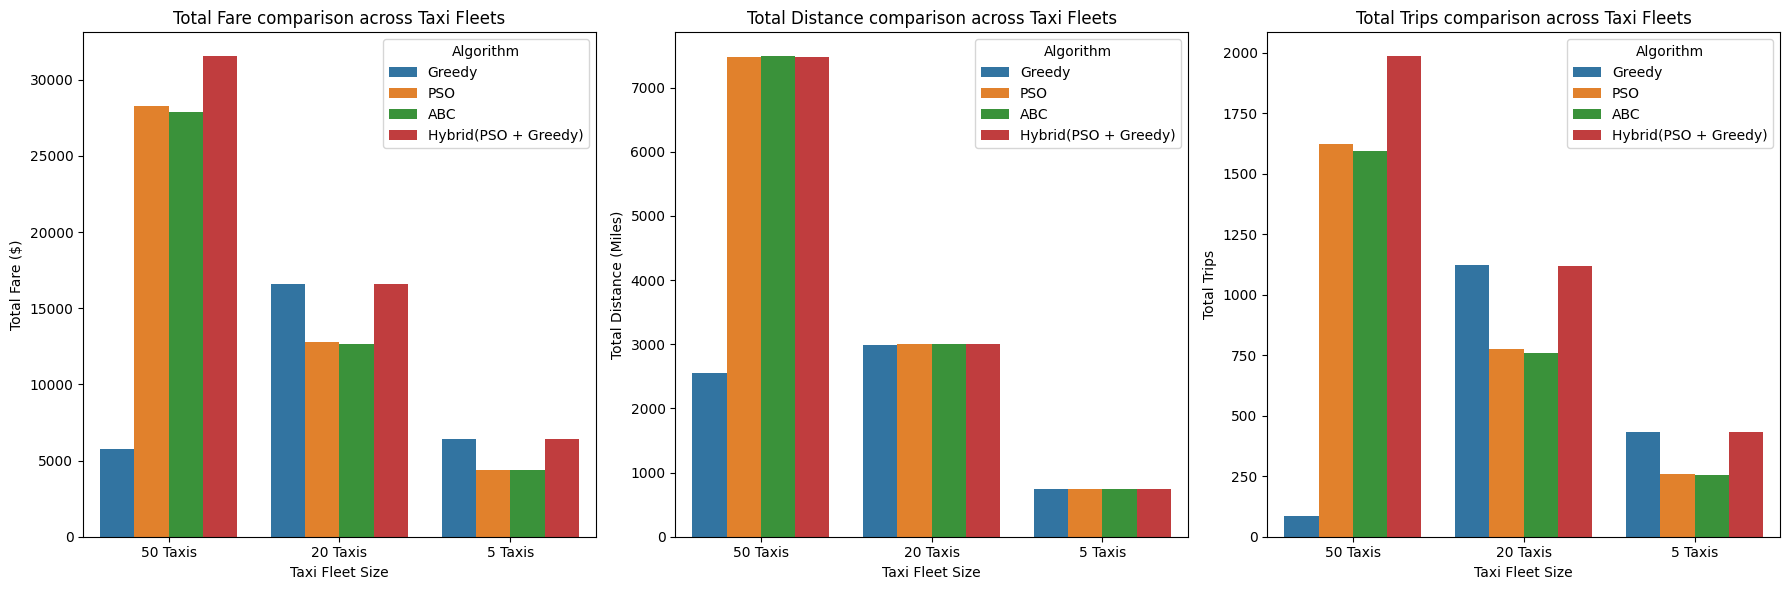

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'Taxi Fleet': ['50 Taxis'] * 4 + ['20 Taxis'] * 4 + ['5 Taxis'] * 4,
    'Algorithm': ['Greedy', 'PSO', 'ABC', 'Hybrid(PSO + Greedy)'] * 3,
    'Total Fare': [5746.97, 28239.02, 27891.66, 31529.57,
                   16558.58, 12773.58, 12640.49, 16586.87,
                   6385.72, 4355.21, 4350.42, 6389.41],
    'Total Distance': [2553.04, 7483.14, 7485.5, 7475.26,
                       2988.5, 2995.76, 2997.02, 2996.8,
                       748.54, 749.76, 749.52, 749.74],
    'Total Trips': [86, 1624, 1595, 1986,
                    1123, 776, 760, 1119,
                    434, 259, 254, 433]
}

df = pd.DataFrame(data)

df_melted = df.melt(id_vars=['Taxi Fleet', 'Algorithm'],
                    value_vars=['Total Fare', 'Total Distance', 'Total Trips'],
                    var_name='Metric', value_name='Value')

df_fare = df_melted[df_melted['Metric'] == 'Total Fare']
df_distance = df_melted[df_melted['Metric'] == 'Total Distance']
df_trips = df_melted[df_melted['Metric'] == 'Total Trips']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

#Total Fare
sns.barplot(data=df_fare, x='Taxi Fleet', y='Value', hue='Algorithm', ax=axes[0])
axes[0].set_title('Total Fare comparison across Taxi Fleets')
axes[0].set_ylabel('Total Fare ($)')
axes[0].set_xlabel('Taxi Fleet Size')
axes[0].tick_params(axis='x', rotation=0)
axes[0].legend(title='Algorithm', loc='upper right')

#Total Distance
sns.barplot(data=df_distance, x='Taxi Fleet', y='Value', hue='Algorithm', ax=axes[1])
axes[1].set_title('Total Distance comparison across Taxi Fleets')
axes[1].set_ylabel('Total Distance (Miles)')
axes[1].set_xlabel('Taxi Fleet Size')
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(title='Algorithm', loc='upper right')

#Total Trips
sns.barplot(data=df_trips, x='Taxi Fleet', y='Value', hue='Algorithm', ax=axes[2])
axes[2].set_title('Total Trips comparison across Taxi Fleets')
axes[2].set_ylabel('Total Trips')
axes[2].set_xlabel('Taxi Fleet Size')
axes[2].tick_params(axis='x', rotation=0)
axes[2].legend(title='Algorithm', loc='upper right')


plt.tight_layout()
plt.show()

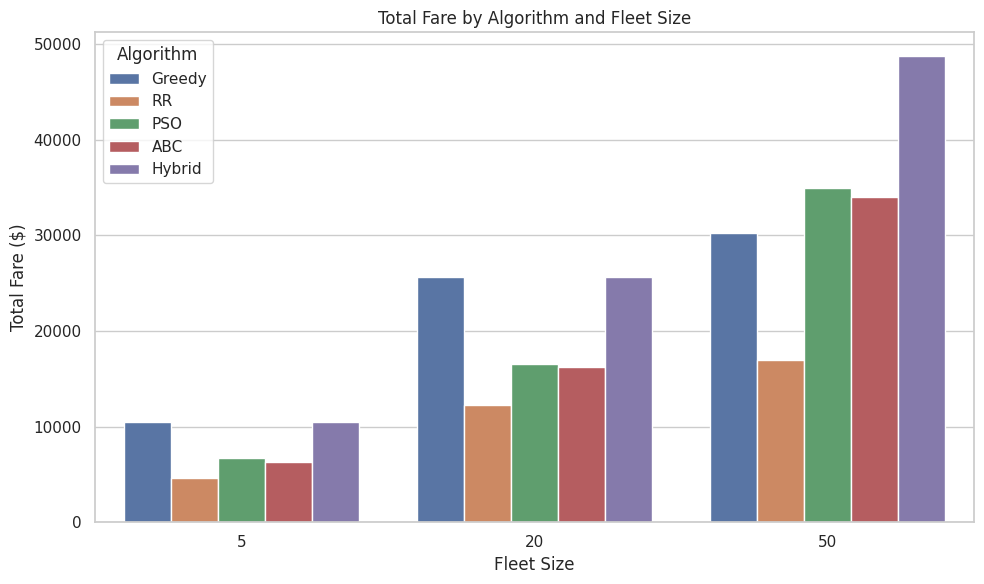

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'Fleet Size': [20, 20, 20, 20, 20, 50, 50, 50, 50, 50, 5, 5, 5, 5, 5],
    'Algorithm': ['Greedy', 'RR', 'PSO', 'ABC', 'Hybrid'] * 3,
    'Total Fare ($)': [
        25597, 12243, 16585, 16192, 25611,
        30300, 16926, 34922, 34036, 48794,
        10456, 4588, 6672, 6310, 10462
    ]
}

df = pd.DataFrame(data)

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Fleet Size', y='Total Fare ($)', hue='Algorithm')

plt.title('Total Fare by Algorithm and Fleet Size')
plt.xlabel('Fleet Size')
plt.ylabel('Total Fare ($)')
plt.legend(title='Algorithm')
plt.tight_layout()

plt.show()


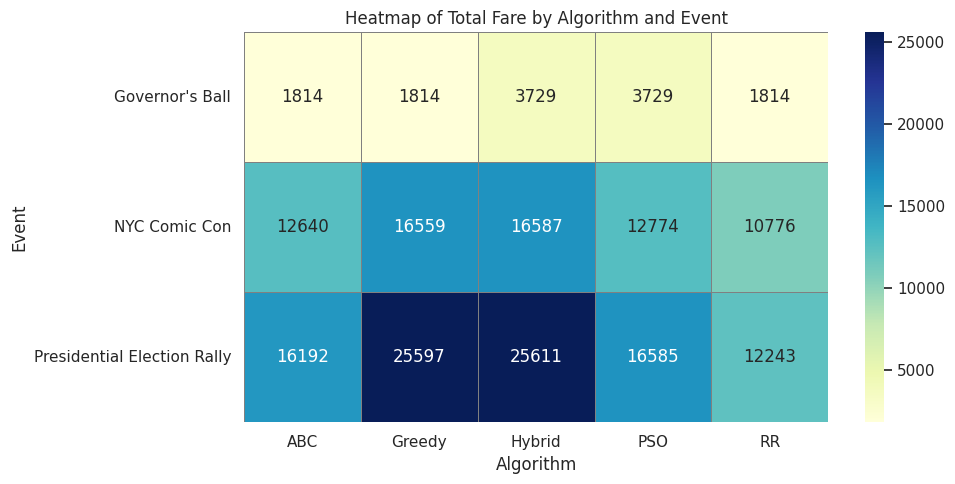

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'Event': [
        'Presidential Election Rally', 'Presidential Election Rally', 'Presidential Election Rally', 'Presidential Election Rally', 'Presidential Election Rally',
        'NYC Comic Con', 'NYC Comic Con', 'NYC Comic Con', 'NYC Comic Con', 'NYC Comic Con',
        'Governor\'s Ball', 'Governor\'s Ball', 'Governor\'s Ball', 'Governor\'s Ball', 'Governor\'s Ball'
    ],
    'Algorithm': ['Greedy', 'RR', 'PSO', 'ABC', 'Hybrid'] * 3,
    'Total Fare ($)': [
        25597, 12243, 16585, 16192, 25611,
        16559, 10776, 12774, 12640, 16587,
        1814, 1814, 3729, 1814, 3729
    ]
}

df = pd.DataFrame(data)

pivot_df = df.pivot(index='Event', columns='Algorithm', values='Total Fare ($)')

pivot_df = pivot_df.loc[['Governor\'s Ball', 'NYC Comic Con', 'Presidential Election Rally']]

plt.figure(figsize=(10, 5))
sns.heatmap(pivot_df, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5, linecolor='gray')

plt.title('Heatmap of Total Fare by Algorithm and Event')
plt.xlabel('Algorithm')
plt.ylabel('Event')
plt.tight_layout()
plt.show()


# Visualisation

In [ ]:
#Unique pickups
print(df[['pickup_latitude','pickup_longitude']].nunique())

pd.set_option('display.float_format', '{:.10f}'.format)
print(df[['pickup_latitude','pickup_longitude']].head(10))


pickup_latitude     1
pickup_longitude    1
dtype: int64
   pickup_latitude  pickup_longitude
0    40.7406758722    -73.8408672623
1    40.7406758722    -73.8408672623
2    40.7406758722    -73.8408672623
3    40.7406758722    -73.8408672623
4    40.7406758722    -73.8408672623
5    40.7406758722    -73.8408672623
6    40.7406758722    -73.8408672623
7    40.7406758722    -73.8408672623
8    40.7406758722    -73.8408672623
9    40.7406758722    -73.8408672623


In [ ]:
#Setup
!pip install -q --upgrade plotly
import pandas as pd, numpy as np, plotly.express as px

df = pd.read_csv('/content/filtered_tripdata.csv')

#Filter trips <10 mi
short_trips = df[df['trip_distance'] < 10].copy()

AVG_SPEED_mph = 30
short_trips['trip_time_hr']       = short_trips['trip_distance'] / AVG_SPEED_mph
short_trips['round_trip_time_hr'] = short_trips['trip_time_hr'] * 2

#Taxi dispatch and path capture
FLEET           = 20
HORIZON_HR      = 5
FRAME_MINUTES   = 1

# Taxi clocks (next‑free time) and last known locations
taxis_clock  = np.zeros(FLEET)
origin_lat   = short_trips.iloc[0].pickup_latitude
origin_lon   = short_trips.iloc[0].pickup_longitude
taxis_place  = [(origin_lat, origin_lon)] * FLEET

records = []

for _, trip in short_trips.iterrows():
    taxi_idx = int(np.argmin(taxis_clock))
    now_hr   = taxis_clock[taxi_idx]

    if now_hr + trip.round_trip_time_hr > HORIZON_HR:
        continue

    #Leg 1: pick‑up -> drop‑off
    out_secs   = max(60, int(trip.trip_time_hr * 3600))
    n_out      = out_secs // (FRAME_MINUTES * 60) + 1
    frac_out   = np.linspace(0, 1, n_out)

    start_lat, start_lon = taxis_place[taxi_idx]
    end_lat,   end_lon   = trip.dropoff_latitude, trip.dropoff_longitude

    lat_out = start_lat + (end_lat - start_lat) * frac_out
    lon_out = start_lon + (end_lon - start_lon) * frac_out

    #Leg 2: drop‑off -> same pick‑up
    n_ret     = n_out
    frac_ret  = np.linspace(0, 1, n_ret)
    lat_ret   = end_lat   + (start_lat - end_lat) * frac_ret
    lon_ret   = end_lon   + (start_lon - end_lon) * frac_ret

    #Timeline stamps (simulation minutes)
    minute0   = int(now_hr * 60)
    timeline  = np.arange(minute0,
                          minute0 + n_out + n_ret)

    #Push BOTH legs into the record list
    for t, lat, lon in zip(timeline,
                           np.concatenate([lat_out, lat_ret]),
                           np.concatenate([lon_out, lon_ret])):
        records.append({
            'step'   : t,
            'taxi_id': f'cab-{taxi_idx:02d}',
            'lat'    : lat,
            'lon'    : lon
        })

    # Update taxi clock & location (back at the pick‑up point)
    taxis_clock[taxi_idx] += trip.round_trip_time_hr
    taxis_place[taxi_idx]  = (start_lat, start_lon)

anim_df = (pd.DataFrame(records)
           .sort_values('step')
           .reset_index(drop=True))

#Animation
fig = px.scatter_mapbox(
    anim_df,
    lat='lat', lon='lon',
    animation_frame='step',
    animation_group='taxi_id',
    color='taxi_id',
    mapbox_style='open-street-map',
    zoom=11,
    center={'lat': 40.75, 'lon': -73.97},
    height=650,
    opacity=0.9
)
fig.update_traces(marker=dict(size=8))
fig.update_layout(
    title='Short‑Trips Simulation (<10 Miles) — with Return to Pick‑Up',
    showlegend=False,
    margin=dict(l=0, r=0, t=45, b=0)
)

fig.show()


/tmp/ipython-input-14-3860718860.py:86: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [ ]:
!pip install -q --upgrade plotly
import pandas as pd, numpy as np, plotly.express as px

df = pd.read_csv('/content/filtered_tripdata.csv')

#Filter Trips >=10 mi
short_trips = df[df['trip_distance'] >= 10].copy()

AVG_SPEED_mph = 30
short_trips['trip_time_hr']       = short_trips['trip_distance'] / AVG_SPEED_mph
short_trips['round_trip_time_hr'] = short_trips['trip_time_hr'] * 2

#Taxi dispatch & path capture
FLEET           = 20
HORIZON_HR      = 5
FRAME_MINUTES   = 1

# Taxi clocks (next‑free time) and last known locations
taxis_clock  = np.zeros(FLEET)
origin_lat   = short_trips.iloc[0].pickup_latitude
origin_lon   = short_trips.iloc[0].pickup_longitude
taxis_place  = [(origin_lat, origin_lon)] * FLEET

records = []

for _, trip in short_trips.iterrows():
    taxi_idx = int(np.argmin(taxis_clock))
    now_hr   = taxis_clock[taxi_idx]

    if now_hr + trip.round_trip_time_hr > HORIZON_HR:
        continue

    #Leg 1: pick‑up -> drop‑off
    out_secs   = max(60, int(trip.trip_time_hr * 3600))
    n_out      = out_secs // (FRAME_MINUTES * 60) + 1
    frac_out   = np.linspace(0, 1, n_out)

    start_lat, start_lon = taxis_place[taxi_idx]
    end_lat,   end_lon   = trip.dropoff_latitude, trip.dropoff_longitude

    lat_out = start_lat + (end_lat - start_lat) * frac_out
    lon_out = start_lon + (end_lon - start_lon) * frac_out

    #Leg 2: drop‑off -> same pick‑up
    n_ret     = n_out
    frac_ret  = np.linspace(0, 1, n_ret)
    lat_ret   = end_lat   + (start_lat - end_lat) * frac_ret
    lon_ret   = end_lon   + (start_lon - end_lon) * frac_ret

    #Timeline stamps (simulation minutes)
    minute0   = int(now_hr * 60)
    timeline  = np.arange(minute0,
                          minute0 + n_out + n_ret)

    #Push BOTH legs into the record list
    for t, lat, lon in zip(timeline,
                           np.concatenate([lat_out, lat_ret]),
                           np.concatenate([lon_out, lon_ret])):
        records.append({
            'step'   : t,
            'taxi_id': f'cab-{taxi_idx:02d}',
            'lat'    : lat,
            'lon'    : lon
        })

    # Update taxi clock & location (back at the pick‑up point)
    taxis_clock[taxi_idx] += trip.round_trip_time_hr
    taxis_place[taxi_idx]  = (start_lat, start_lon)

anim_df = (pd.DataFrame(records)
           .sort_values('step')
           .reset_index(drop=True))

#Animation
fig = px.scatter_mapbox(
    anim_df,
    lat='lat', lon='lon',
    animation_frame='step',
    animation_group='taxi_id',
    color='taxi_id',
    mapbox_style='open-street-map',
    zoom=11,
    center={'lat': 40.75, 'lon': -73.97},
    height=650,
    opacity=0.9
)
fig.update_traces(marker=dict(size=8))
fig.update_layout(
    title='Long‑Trips Simulation (>10 Miles) — with Return to Pick‑Up',
    showlegend=False,
    margin=dict(l=0, r=0, t=45, b=0)
)

fig.show()


/tmp/ipython-input-16-2301272845.py:86: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [ ]:
!pip install -q --upgrade plotly
import pandas as pd, numpy as np, plotly.express as px

df = pd.read_csv('/content/filtered_tripdata.csv')

short_trips = df.copy()

AVG_SPEED_mph = 30
short_trips['trip_time_hr']       = short_trips['trip_distance'] / AVG_SPEED_mph
short_trips['round_trip_time_hr'] = short_trips['trip_time_hr'] * 2

#Taxi dispatch & path capture
FLEET           = 20
HORIZON_HR      = 5
FRAME_MINUTES   = 1

# Taxi clocks (next‑free time) and last known locations
taxis_clock  = np.zeros(FLEET)
origin_lat   = short_trips.iloc[0].pickup_latitude
origin_lon   = short_trips.iloc[0].pickup_longitude
taxis_place  = [(origin_lat, origin_lon)] * FLEET

records = []

for _, trip in short_trips.iterrows():
    taxi_idx = int(np.argmin(taxis_clock))
    now_hr   = taxis_clock[taxi_idx]

    if now_hr + trip.round_trip_time_hr > HORIZON_HR:
        continue

    #Leg 1: pick‑up -> drop‑off
    out_secs   = max(60, int(trip.trip_time_hr * 3600))
    n_out      = out_secs // (FRAME_MINUTES * 60) + 1
    frac_out   = np.linspace(0, 1, n_out)

    start_lat, start_lon = taxis_place[taxi_idx]
    end_lat,   end_lon   = trip.dropoff_latitude, trip.dropoff_longitude

    lat_out = start_lat + (end_lat - start_lat) * frac_out
    lon_out = start_lon + (end_lon - start_lon) * frac_out

    #Leg 2: drop‑off -> same pick‑up
    n_ret     = n_out
    frac_ret  = np.linspace(0, 1, n_ret)
    lat_ret   = end_lat   + (start_lat - end_lat) * frac_ret
    lon_ret   = end_lon   + (start_lon - end_lon) * frac_ret

    #Timeline stamps (simulation minutes)
    minute0   = int(now_hr * 60)
    timeline  = np.arange(minute0,
                          minute0 + n_out + n_ret)

    #Push BOTH legs into the record list
    for t, lat, lon in zip(timeline,
                           np.concatenate([lat_out, lat_ret]),
                           np.concatenate([lon_out, lon_ret])):
        records.append({
            'step'   : t,
            'taxi_id': f'cab-{taxi_idx:02d}',
            'lat'    : lat,
            'lon'    : lon
        })

    # Update taxi clock & location (back at the pick‑up point)
    taxis_clock[taxi_idx] += trip.round_trip_time_hr
    taxis_place[taxi_idx]  = (start_lat, start_lon)

anim_df = (pd.DataFrame(records)
           .sort_values('step')
           .reset_index(drop=True))

#Animation
fig = px.scatter_mapbox(
    anim_df,
    lat='lat', lon='lon',
    animation_frame='step',
    animation_group='taxi_id',
    color='taxi_id',
    mapbox_style='open-street-map',
    zoom=11,
    center={'lat': 40.75, 'lon': -73.97},
    height=650,
    opacity=0.9
)
fig.update_traces(marker=dict(size=8))
fig.update_layout(
    title='Regular‑Trips Simulation — with Return to Pick‑Up',
    showlegend=False,
    margin=dict(l=0, r=0, t=45, b=0)
)

fig.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 51.9 MB/s eta 0:00:00


/tmp/ipython-input-6-254253912.py:84: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.scatter_mapbox(
